# Analisis Exploratorio de Datos - Udemy

In [7]:
#Importamos las librerias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import ydata_profiling
from ydata_profiling import ProfileReport
import langdetect
from langdetect import detect
import googletrans
from googletrans import Translator
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('all')


%matplotlib inline
%config IPCompleter.greedy=True

Importamos los Dataset

In [8]:
#Importamos todos los datasets
udemy_courses = pd.read_csv(r"C:\Users\miche\OneDrive\Escritorio\Henry\Proyecto_DatAnalitycs\DataSets_originales\udemy_courses.csv" , parse_dates=["published_timestamp"], infer_datetime_format=True) #dataset importado ok
udemy_reviews = pd.read_csv(r"C:\Users\miche\OneDrive\Escritorio\Henry\Proyecto_DatAnalitycs\DataSets_originales\udemy_rating.csv")

In [9]:
#Dejamos solo las filas que necesitaremos como el course_id y rating
udemy_reviews = udemy_reviews[["course_id","rating"]]
#Borramos los duplicados
udemy_reviews.drop_duplicates(keep="first", inplace=True)

Hacemos un merge

In [10]:
#Realizamos un merge de los dos datasets por la columna clave "course_id"
udemy_courses = pd.merge(udemy_courses, udemy_reviews, how="left", on="course_id")

Verificacion de que el merge fue correcto

In [11]:
udemy_courses.head(2) #Verificamos si el dataset fue importado de forma correcta.

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58,Business Finance,0.76
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20,Business Finance,0.96


Verificamos la informacion y tipo de dato en el Dataset

In [12]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682 entries, 0 to 3681
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   course_id            3682 non-null   int64         
 1   course_title         3682 non-null   object        
 2   url                  3682 non-null   object        
 3   is_paid              3682 non-null   bool          
 4   price                3682 non-null   int64         
 5   num_subscribers      3682 non-null   int64         
 6   num_reviews          3682 non-null   int64         
 7   num_lectures         3682 non-null   int64         
 8   level                3682 non-null   object        
 9   content_duration     3682 non-null   float64       
 10  published_timestamp  3682 non-null   datetime64[ns]
 11  subject              3682 non-null   object        
 12  rating               3682 non-null   float64       
dtypes: bool(1), datetime64[ns](1), fl

Agregamos nuevas columnas:
* year : datetime
* month : datetime
* day : datetime

Trasformamos la columna: published_timestamp

In [13]:
#Creamos las nuevas columnas
udemy_courses.insert(12, "published_year", value="")
udemy_courses.insert(13, "published_month_name", value="")
udemy_courses.insert(14, "published_day_name", value="")
udemy_courses.insert(15, "published_day", value="")
udemy_courses.insert(16, "language", value="")



#Poblamos las nuevas columnas
udemy_courses["published_year"] =  udemy_courses["published_timestamp"].dt.year
udemy_courses["published_month_name"]=  udemy_courses["published_timestamp"].dt.month_name()
udemy_courses["published_day_name"] =  udemy_courses["published_timestamp"].dt.day_name()
udemy_courses["published_day"] =  udemy_courses["published_timestamp"].dt.day
    

Pasamos de ingles a español en las variables published_month y published_day

In [14]:
#published_day_name
udemy_courses.published_day_name = udemy_courses.published_day_name.str.replace("Monday", "Lunes")
udemy_courses.published_day_name = udemy_courses.published_day_name.str.replace("Tuesday", "Martes")
udemy_courses.published_day_name = udemy_courses.published_day_name.str.replace("Wednesday", "Miercoles")
udemy_courses.published_day_name = udemy_courses.published_day_name.str.replace("Thursday", "Jueves")
udemy_courses.published_day_name = udemy_courses.published_day_name.str.replace("Friday", "Viernes")
udemy_courses.published_day_name = udemy_courses.published_day_name.str.replace("Saturday", "Sabado")
udemy_courses.published_day_name = udemy_courses.published_day_name.str.replace("Sunday", "Domingo")

#published_month_name
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("January", "Enero")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("February", "Febrero")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("March", "Marzo")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("April", "Abril")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("May", "Mayo")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("June", "Junio")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("July", "Julio")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("August", "Agosto")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("September", "Septiembre")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("October", "Octubre")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("November", "Noviembre")
udemy_courses.published_month_name = udemy_courses.published_month_name.str.replace("December", "Diciembre")

Conversion de Variables

In [15]:
#Convertimos el tipo de dato de las variables necesarias para poder trabajarlas
udemy_courses.published_year = udemy_courses.published_year.astype("int")
udemy_courses.published_month_name = udemy_courses.published_month_name.astype("category")
udemy_courses.published_day_name = udemy_courses.published_day_name.astype("category")
udemy_courses.published_day = udemy_courses.published_day.astype("category")
udemy_courses.is_paid = udemy_courses.is_paid.astype("category")
udemy_courses.subject = udemy_courses.subject.astype("category")
udemy_courses.level = udemy_courses.level.astype("category") 

Extraeremos el idioma de cada titulo para poder tener el idioma del curso.

In [16]:
#Transformar idiomas con detect.
def detect_language(idioma): # Definimos la función. 
    try: # Usamos try-except para que maneje los errores y pueda ejecutarse sin problemas. 
        return detect(idioma) # Aplicamos la función "detect" al parametro enviado.  
    except:
        return "Unknow" #retornamos nulo si nos encontramos con problemas. 

#Aplicacion de la funcion a las columnas language y subtitles
udemy_courses.loc[:, 'language'] = udemy_courses['course_title'].apply(detect_language) # Aplicamos todos los valores detectados en la función a la columna language

Reemplazamos los valores transformados por la funcion detect_language

In [17]:
#Cambiamos
udemy_courses.language = udemy_courses.language.replace({"en":"English", "es":"Spanish", "fr":"French", "zh-tw": "Chinese", "zh-cn": "Chinese", "pt":"Portuguese", "it":"Italian", "de":"Deutsch", "ar":"Arabic", "tl":"English", "ru":"Russian", "et":"Etiopian"})
udemy_courses.language = udemy_courses.language.replace({"ca":"English","no":"Norway","ja":"Japan", "nl":"Netherlands", "af":"Afghanistan"})
udemy_courses.language = udemy_courses.language.replace({"ro":"Rumania", "da":"Denmark", "sv": "Spanish", "tr":"Turkey"})
udemy_courses.language = udemy_courses.language.replace({"id":"Indonesia", "vi":"English", "sw":"Sweden","pl":"Poland", "th": "Thailand", "hr":"Croatia", "ko":"Japan", "so":"Somalia"})

Describe

In [18]:
udemy_courses.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,published_year,rating
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.758279e+05,66.061923,3205.803368,156.197719,40.098316,4.093056,2015.431016,0.610530
std,3.433313e+05,61.025929,9502.576216,934.949128,50.364799,6.050965,1.185461,0.334387
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000
25%,4.071060e+05,20.000000,111.000000,4.000000,15.000000,1.000000,2015.000000,0.280000
50%,6.879170e+05,45.000000,912.000000,18.000000,25.000000,2.000000,2016.000000,0.760000
75%,9.613555e+05,95.000000,2557.250000,67.000000,45.750000,4.500000,2016.000000,0.930000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000,1.000000


Correlacion

In [19]:
udemy_courses.corr(method="pearson")

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,published_year,rating
course_id,1.000000,0.143462,-0.168014,-0.058519,-0.024014,-0.056787,0.933207,0.053516
price,0.143462,1.000000,0.050888,0.113550,0.330449,0.293494,0.134210,0.031990
num_subscribers,-0.168014,0.050888,1.000000,0.649638,0.157489,0.161566,-0.184510,-0.008099
num_reviews,-0.058519,0.113550,0.649638,1.000000,0.242996,0.228880,-0.053302,0.004164
num_lectures,-0.024014,0.330449,0.157489,0.242996,1.000000,0.801653,-0.024502,-0.036744
content_duration,-0.056787,0.293494,0.161566,0.228880,0.801653,1.000000,-0.058379,0.000823
published_year,0.933207,0.134210,-0.184510,-0.053302,-0.024502,-0.058379,1.000000,0.059404
rating,0.053516,0.031990,-0.008099,0.004164,-0.036744,0.000823,0.059404,1.000000


Verificamos que las transformaciones fueron exitosas

In [20]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682 entries, 0 to 3681
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   course_id             3682 non-null   int64         
 1   course_title          3682 non-null   object        
 2   url                   3682 non-null   object        
 3   is_paid               3682 non-null   category      
 4   price                 3682 non-null   int64         
 5   num_subscribers       3682 non-null   int64         
 6   num_reviews           3682 non-null   int64         
 7   num_lectures          3682 non-null   int64         
 8   level                 3682 non-null   category      
 9   content_duration      3682 non-null   float64       
 10  published_timestamp   3682 non-null   datetime64[ns]
 11  subject               3682 non-null   category      
 12  published_year        3682 non-null   int32         
 13  published_month_na

Conteo de nulos - Numeros

In [21]:
udemy_courses.isnull().sum()
#El dataset udemy_courses no tiene nulos.

course_id               0
course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                   0
content_duration        0
published_timestamp     0
subject                 0
published_year          0
published_month_name    0
published_day_name      0
published_day           0
language                0
rating                  0
dtype: int64

Conteo de Duplicados

In [22]:
print(f'Valores Duplicados del dataset Coursera_courses: {udemy_courses.duplicated().sum()}')

Valores Duplicados del dataset Coursera_courses: 6


Mostramos por pantalla los duplicados

In [23]:
udemy_courses[udemy_courses.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year,published_month_name,published_day_name,published_day,language,rating
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30,Business Finance,2016,Mayo,Lunes,16,English,0.15
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01,Business Finance,2017,Abril,Domingo,23,English,0.95
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17,Business Finance,2016,Diciembre,Jueves,15,English,0.07
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35,Business Finance,2017,Julio,Domingo,2,English,0.18
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55,Graphic Design,2014,Abril,Martes,15,French,0.76
2562,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31,Web Development,2013,Enero,Jueves,3,English,0.31


Borramos los registros duplicados y mantenemos el primero.

In [24]:
udemy_courses.drop_duplicates(keep="first", inplace=True)

Verificamos si los duplicados fueron removidos con exito

In [25]:
print(f'Valores Duplicados del dataset edx_courses: {udemy_courses.duplicated().sum()}')

Valores Duplicados del dataset edx_courses: 0


Reseteamos el index del dataset

In [26]:
udemy_courses = udemy_courses.reset_index(drop=True)

Creacion de Funciones

In [27]:
def word_cloud(variable:str, numero_palabras=200):
   
    #Creamos una lista vacia
    listaPalabras = []
    #Recorremos la columna para extraer el teto y agregarlo a la lista vacia.
    for elemento in udemy_courses[variable]:
        listaPalabras.append(elemento)

    #Hacemos la union de cada palabra, para convertirla a un str
    listaPalabras = " ".join(listaPalabras)
    listaPalabras = listaPalabras.replace("'", "")

    #creamos la variable que contiene stopwords de ingles y español
    stop_words = set(stopwords.words(["spanish", "english"]))

    #Generamos el wordcloud
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", relative_scaling=0, max_words=numero_palabras).generate(listaPalabras)

    # Procesar el texto para obtener las frecuencias de las palabras
    frecuencias = wordcloud.process_text(listaPalabras)

    #Cambiamos el orden de las frecuencias
    frecuencias = dict(sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)[:numero_palabras])
    
    # Generar la nube de palabras a partir de las frecuencias
    wordcloud.generate_from_frequencies(frecuencias)
    
    #Creamos la figura:
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    print(f'Las {numero_palabras} palabras mas frecuentes dentro de la variable {variable} son : {frecuencias}')
    

# Analisis Univariante

course_title - wordcloud

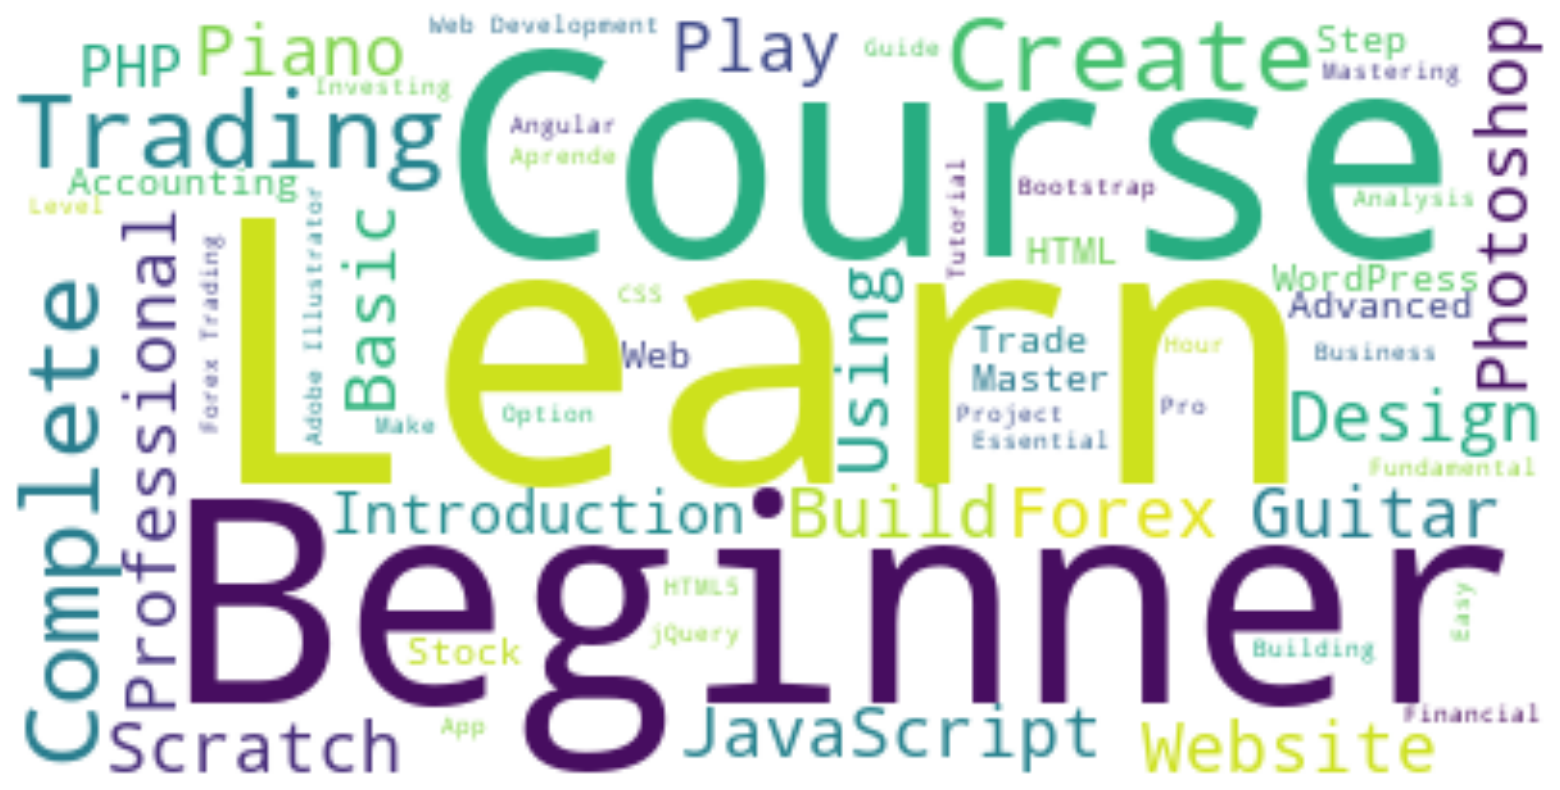

Las 200 palabras mas frecuentes dentro de la variable course_title son : {'Learn': 496, 'Beginner': 397, 'Course': 194, 'Trading': 166, 'Complete': 156, 'Create': 154, 'JavaScript': 153, 'Basic': 152, 'Build': 146, 'Design': 137, 'Piano': 136, 'Website': 125, 'Photoshop': 125, 'Guitar': 120, 'Scratch': 113, 'Play': 98, 'Professional': 97, 'Forex': 96, 'Using': 94, 'Introduction': 93, 'PHP': 91, 'Accounting': 89, 'WordPress': 86, 'Stock': 85, 'Master': 83, 'Step': 82, 'Advanced': 78, 'Web': 75, 'HTML': 74, 'Trade': 72, 'Web Development': 70, 'Guide': 69, 'Project': 68, 'Option': 64, 'Business': 62, 'Bootstrap': 60, 'Angular': 59, 'CSS': 57, 'Forex Trading': 57, 'Make': 56, 'Hour': 56, 'Financial': 55, 'Essential': 55, 'Adobe Illustrator': 55, 'Fundamental': 54, 'jQuery': 54, 'Analysis': 52, 'Mastering': 52, 'Building': 52, 'Level': 51, 'Aprende': 51, 'Tutorial': 50, 'App': 49, 'Investing': 48, 'Easy': 48, 'HTML5': 48, 'Pro': 46, 'Instant Harmonica': 46, 'HTML CSS': 45, 'Become': 43, 'St

In [28]:
word_cloud("course_title")

is_paid - pie

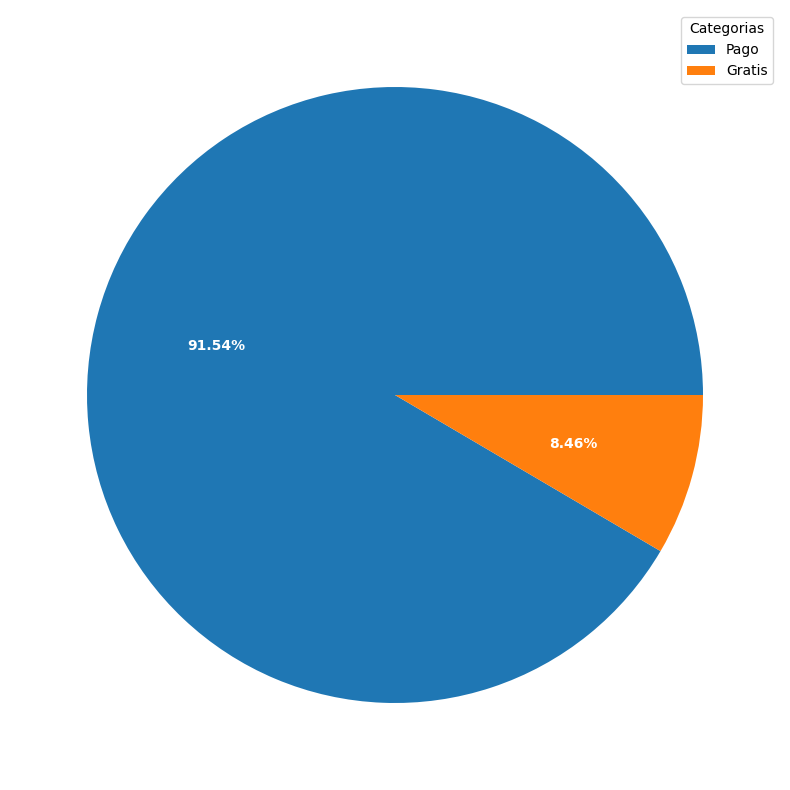

In [29]:
#Contamos:
conteo_level = udemy_courses.is_paid.value_counts().sort_values(ascending=False)


#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))

#Grafico de Pie
ax.pie(conteo_level.values, labels=conteo_level.index, autopct="%.2f%%",textprops={"fontweight":"bold","color": "white"})
etiquetas= ["Pago", "Gratis"]
ax.legend(etiquetas, title="Categorias")
plt.show();

Insight:
* La gran mayoria de los cursos deben ser pagados.
* Solo un 8.44% de cursos son gratis.

price - histograma

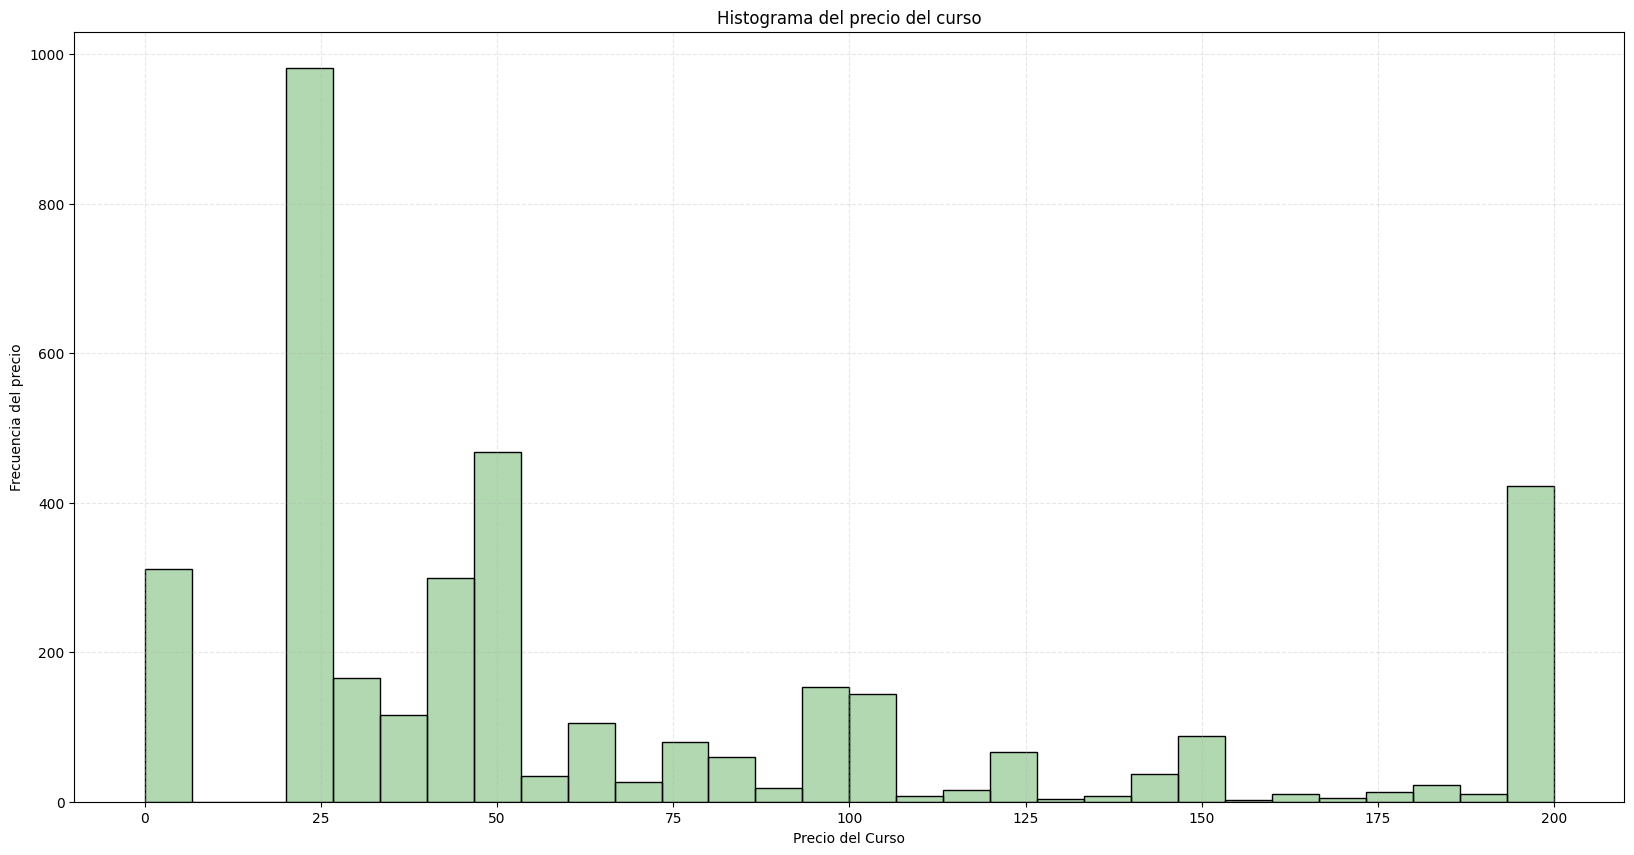

In [30]:
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))

#Realizamos un histograma para ver la variacion del precio
sns.histplot(x=udemy_courses.price, bins=30, color="green", alpha=0.3)
ax.set_ylabel("Frecuencia del precio")
ax.set_xlabel("Precio del Curso")
ax.set_title("Histograma del precio del curso")
ax.grid(visible=True, ls="--", alpha=0.30)
plt.show();

Insight:
* El valor del curso tiene una variacion considerable que va desde el 0 hasta los $200 USD, siendo este un rango mas accesible en comparacion a la competencia directa que es Edx.
* El valor mas frecuencuente para el precio de un curso es de $21 a $25
* Debemos hacer un analisis mas profundo en base a los 3 picos (frecuencia) del precio de los cursos.
* Haciendo una comparacion contra el competidor Edx, vemos que existe cierta correlacion entre los precios del curso (Udemy) y el pago del certificado (Edx). Donde los picos o precios mas frecuentes en ambos son de $50 USD asi como de $200 USD.

num_subscribers - densidad

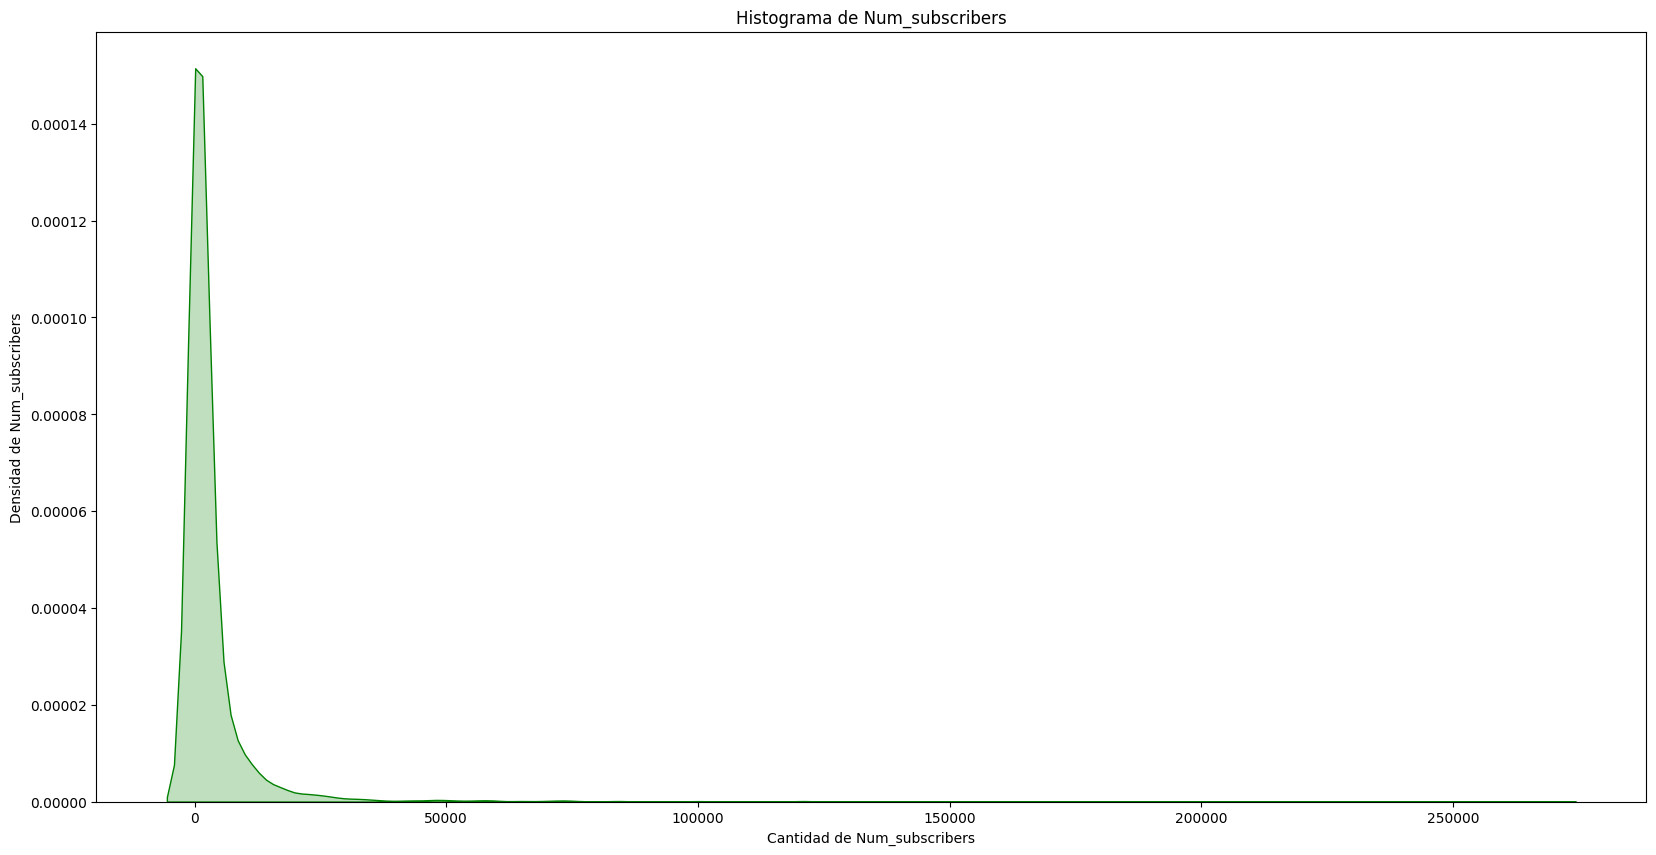

In [31]:
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))

#Realizmos un grafico de densidad
sns.kdeplot(udemy_courses.num_subscribers, color = "green",fill=True)
ax.set_ylabel("Densidad de Num_subscribers")
ax.set_xlabel("Cantidad de Num_subscribers")
ax.set_title("Histograma de Num_subscribers")
plt.show();

Insight:
* Podemos apreciar que existe una gran concentracion en que los cursos por lo general poseen un rango de inscritos entre 0 y 25.000 subscritores.
* Fuera de la concentracion vemos que el grafico empieza a tender a 0 por ende significa que existe una concentracion casi nula de suscriptores inscritos.
* El maximo de suscriptores inscritos es de 268923.

num_reviews - hist

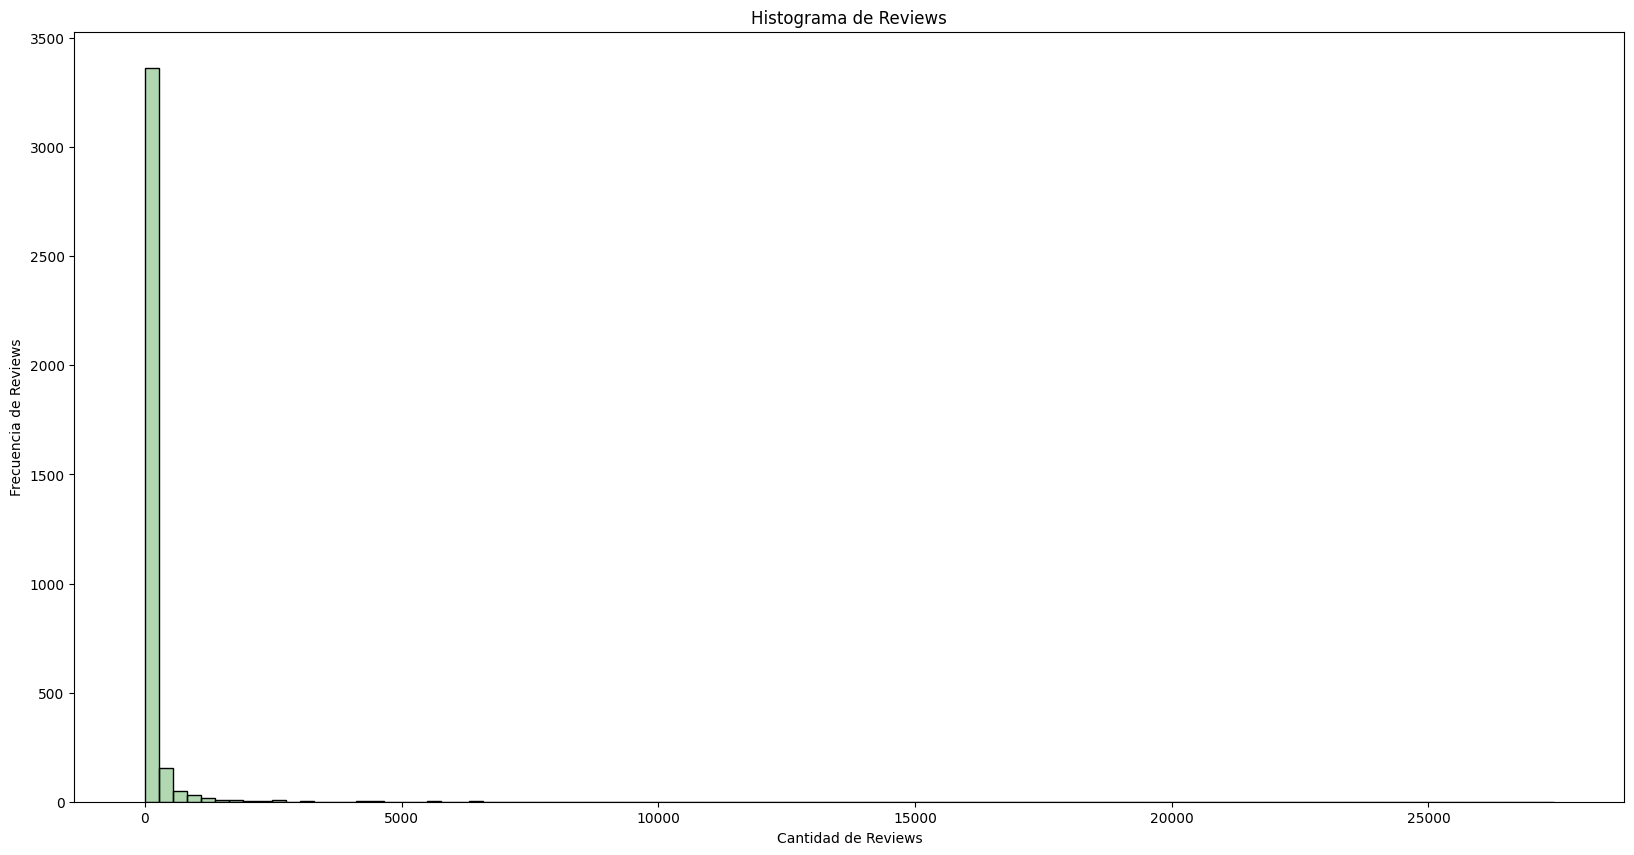

In [32]:
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))

#Realizamos un histograma
sns.histplot(x=udemy_courses.num_reviews, bins= 100, color="green", alpha=0.3, fill=True)
ax.set_ylabel("Frecuencia de Reviews")
ax.set_xlabel("Cantidad de Reviews")
ax.set_title("Histograma de Reviews")



plt.show();

Insight:
* Este grafico por si solo no nos brinda tanta informacion, esperamos inicio del multivariable para poder obtener una mejor vista de la realidad de los datos.

num_lectures - histograma

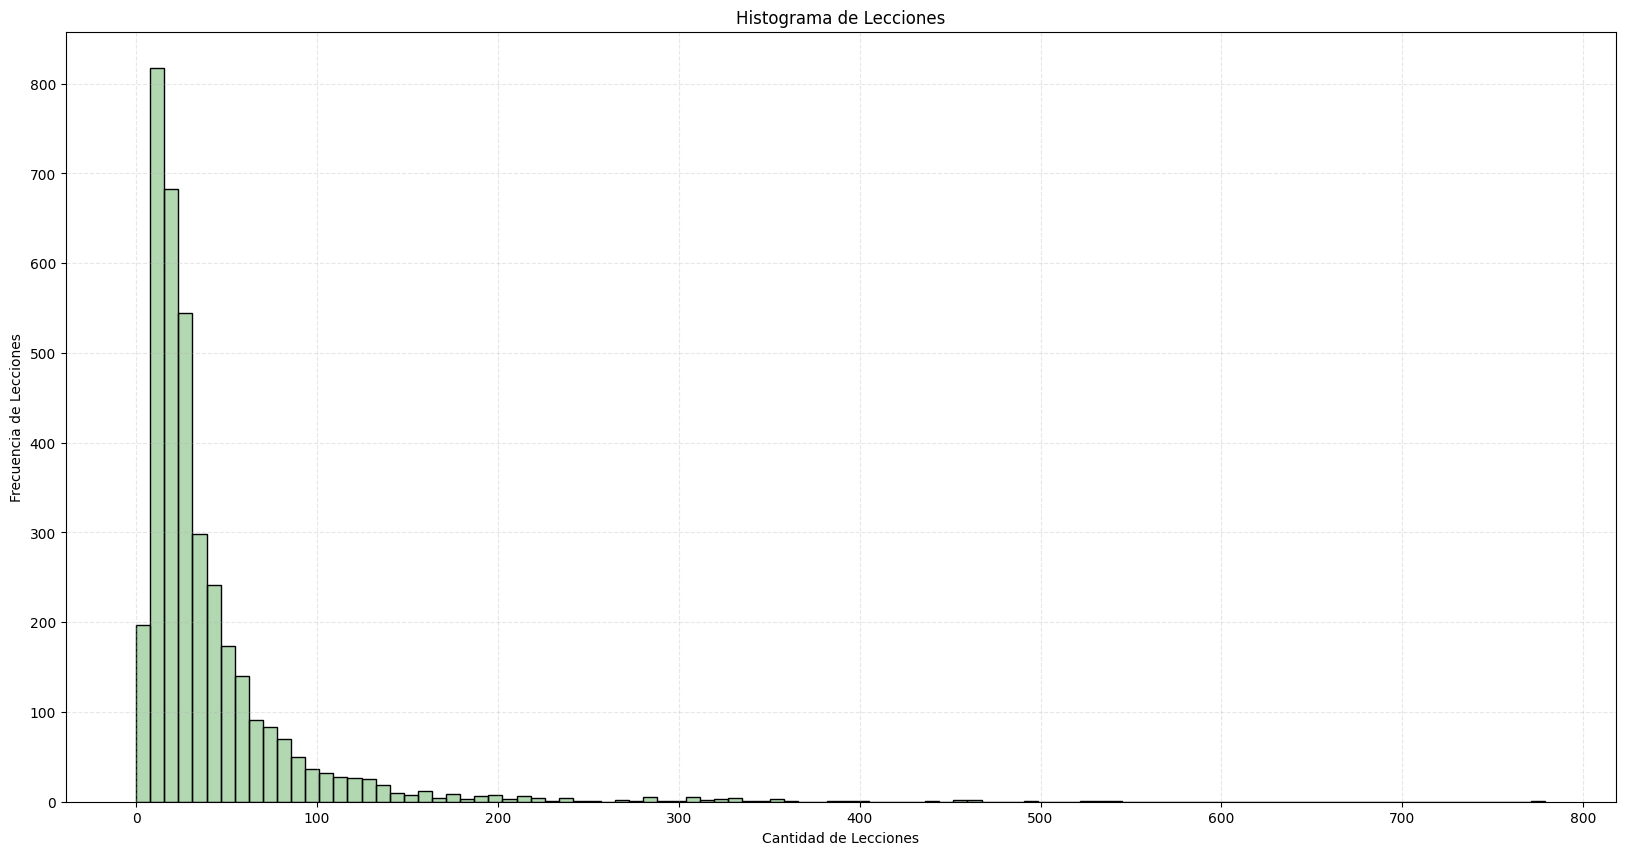

In [33]:
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))

#Realizamos un histograma
sns.histplot(x=udemy_courses["num_lectures"], bins=100, color="green", alpha=0.3)
ax.set_ylabel("Frecuencia de Lecciones")
ax.set_xlabel("Cantidad de Lecciones")
ax.set_title("Histograma de Lecciones")
ax.grid(visible=True, ls="--", alpha=0.30)

plt.show();

Insight:
* Los mayoria de los cursos tienen un rango de lecciones de 0 a 100 lecciones.
* La moda para las lecciones que se imparten es de 12.

level - barras

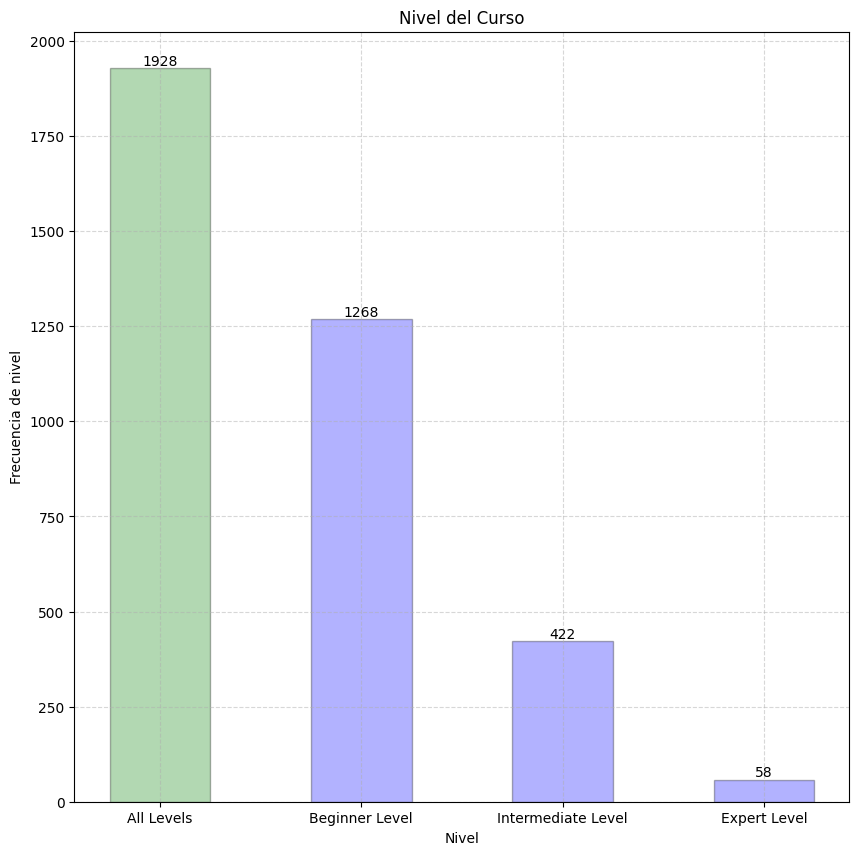

In [34]:
#Contamos:
conteo_level = udemy_courses.level.value_counts()

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.bar(conteo_level.index, conteo_level.values, width=0.5, edgecolor="black",color=["green", "blue","blue","blue"], alpha=0.3)
ax.set_ylabel("Frecuencia de nivel")
ax.set_xlabel("Nivel")
ax.set_title("Nivel del Curso")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for ind, val in enumerate(conteo_level):
    plt.text(ind, val, int(val), ha="center", va="bottom")
plt.show();

Insight:
* Podemos ver que del total de cursos casi el 53% pertenece al nivel "all levels", esto significa que cualquier suscriptor puede realizar este curso sin conocimiento previo porque en dicho programa le sera explicado.
* Los cursos para nivel "expert" son los que poseen una menor cantidad de programas a ofrecer.

published_year - line

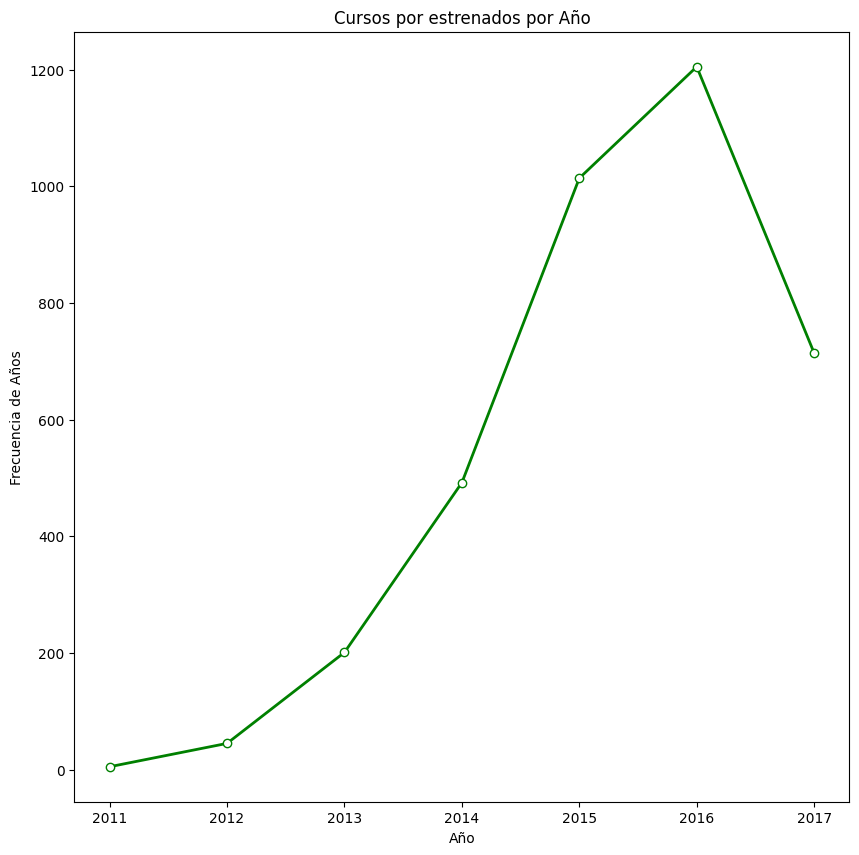

In [35]:
#Contamos:
conteo_pyear = udemy_courses.published_year.value_counts().sort_index()

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.plot(conteo_pyear.index, conteo_pyear.values, color= "green",lw=2 ,marker="o", markerfacecolor="white")
ax.set_ylabel("Frecuencia de Años")
ax.set_xlabel("Año")
ax.set_title("Cursos por estrenados por Año")
plt.show();

Insight:
* Podemos ver que en el año 2013 llegan a lo que serian sus primeros 200 cursos.
* Podemos observar que desde el año 2011 al 2016 existe una constante subida de la linea en el grafico, lo que constituye que a medida que pasaron los años la creacion de nuevos cursos tambien iba en aumento.
* Luego en el año 2017 vemos que el lanzamiento de cursos disminuye considerablemente en comparacion al año 2016 y aun asi siendo mas bajo que el año 2015.

published_month_name - line

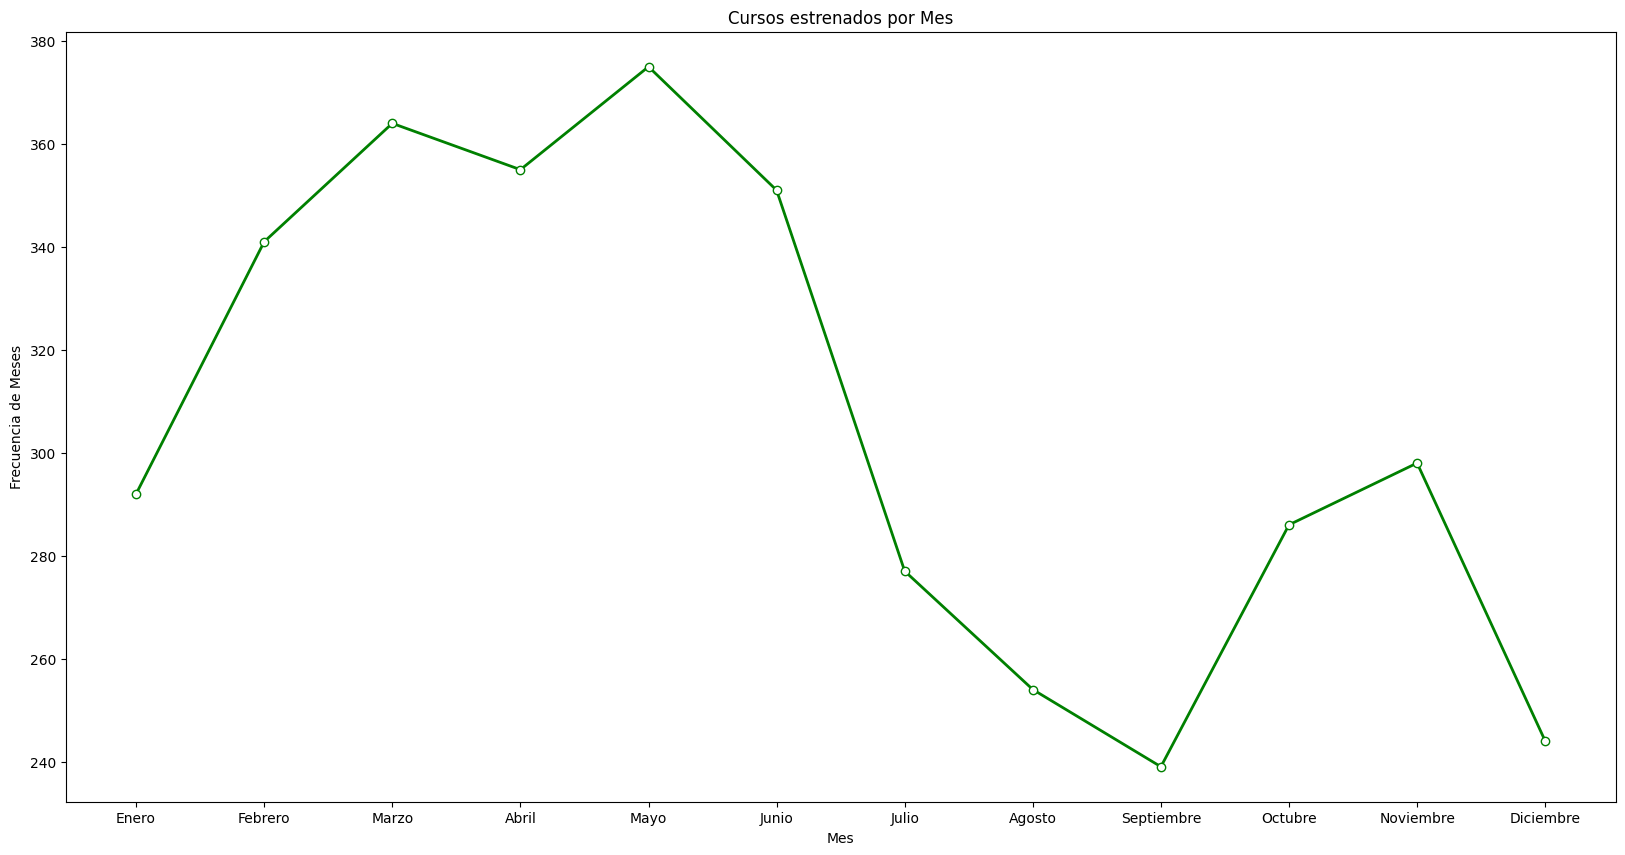

In [36]:
#Contamos:
conteo_pmonth = udemy_courses.published_month_name.value_counts().sort_index()

#reindex
meses_esp = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

#nueva variable con el index necesario
conteo_pmonth = conteo_pmonth.reindex(meses_esp)

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))
ax.plot(conteo_pmonth.index, conteo_pmonth.values, color= "green",lw=2 ,marker="o", markerfacecolor="white")
ax.set_ylabel("Frecuencia de Meses")
ax.set_xlabel("Mes")
ax.set_title("Cursos estrenados por Mes")
plt.show();

Reseteamos el index del dataset

Insight:
* Existe una gran cantidad de cursos estrenados desde enero a mayo donde fue el pico mas alto de estreno con 370 cursos estrenados.
* Luego de mayo la cantidad de cursos estrenados fue disminuyendo hasta llegar al punto mas bajo en septiembre con 240 cursos estrenados.
* En octubre vuelve a reputar a la alza con un incremento del 20% con respecto al mes anterior.

published_day_name - line

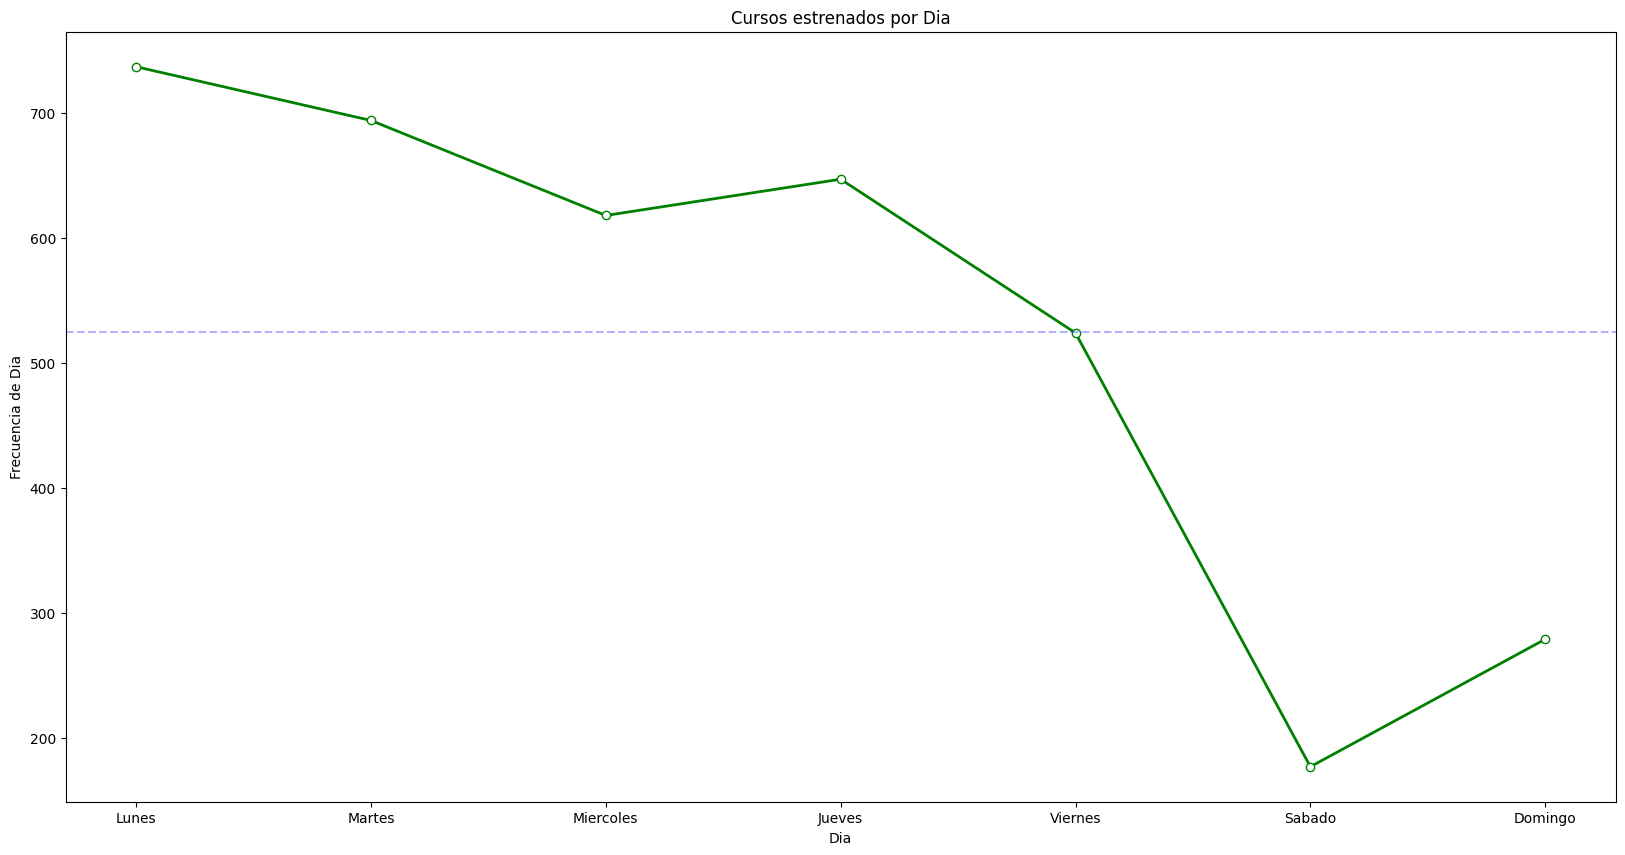

In [37]:
#Contamos:
conteo_pdayname = udemy_courses.published_day_name.value_counts()

#reindex
dias_esp = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

#nueva variable con el index necesario
conteo_pdayname = conteo_pdayname.reindex(dias_esp)

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))
ax.plot(conteo_pdayname.index, conteo_pdayname.values, color= "green",lw=2 ,marker="o", markerfacecolor="white")
ax.set_ylabel("Frecuencia de Dia")
ax.set_xlabel("Dia")
ax.set_title("Cursos estrenados por Dia")
ax.axhline(conteo_pdayname.values.mean(), ls="--", color="blue", alpha=0.3) #Promedio de los estrenos de la semana.
plt.show();

Insight:
* Los cursos por lo general son estrenados los dias lunes.
* A medida que pasan los dias la cantidad de cursos estrenados disminuye hasta llegar al punto mas minimo que es 180 en el dia sabado.
* Durante los dias lunes a viernes se mantiene la cantidad de estrenos por encima del promedio.

published_day - line

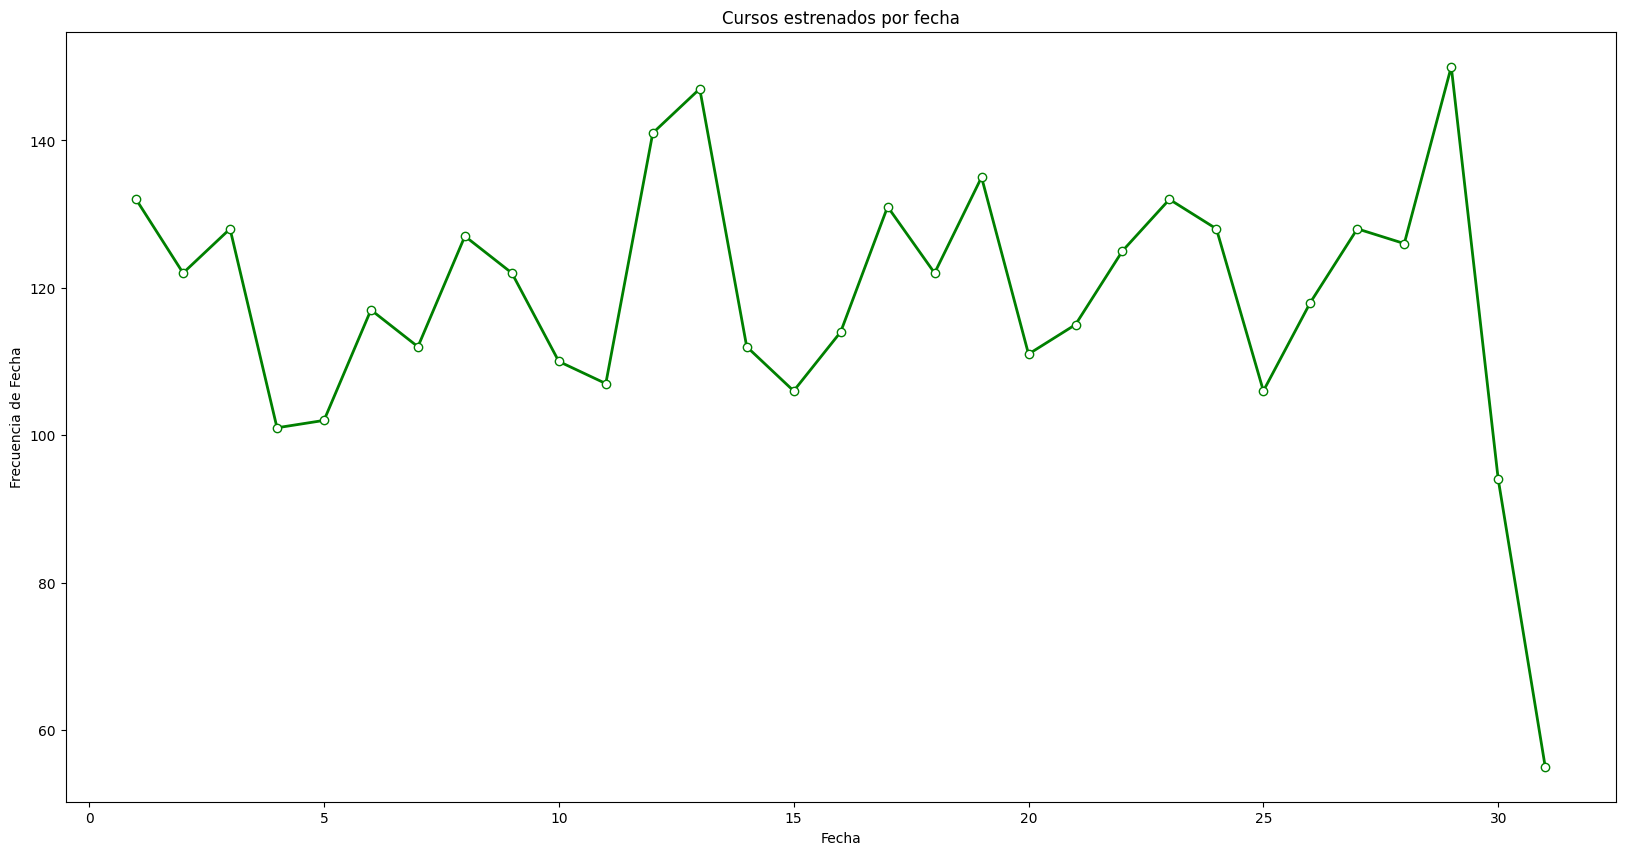

In [38]:
#Contamos:
conteo_pday = udemy_courses.published_day.value_counts().sort_index()

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))
ax.plot(conteo_pday.index, conteo_pday.values, color= "green",lw=2 ,marker="o", markerfacecolor="white")
ax.set_ylabel("Frecuencia de Fecha")
ax.set_xlabel("Fecha")
ax.set_title("Cursos estrenados por fecha")
plt.show();

Insight:
* Existe una gran fluctuacion en los estrenos por dia (fecha).
* Podemos ver que los 2 picos estan en las fechas 13 y 28. Fechas muy particulares por temas de dinero para los suscriptores. ¿A que nos referimos? Por lo general en America los trabajadores cobran su sueldo los dias 15 o 30 de cada mes, por ende estrenar un curso un 13 o 28 podria asegurar la compra del mismo.

subject - barrah

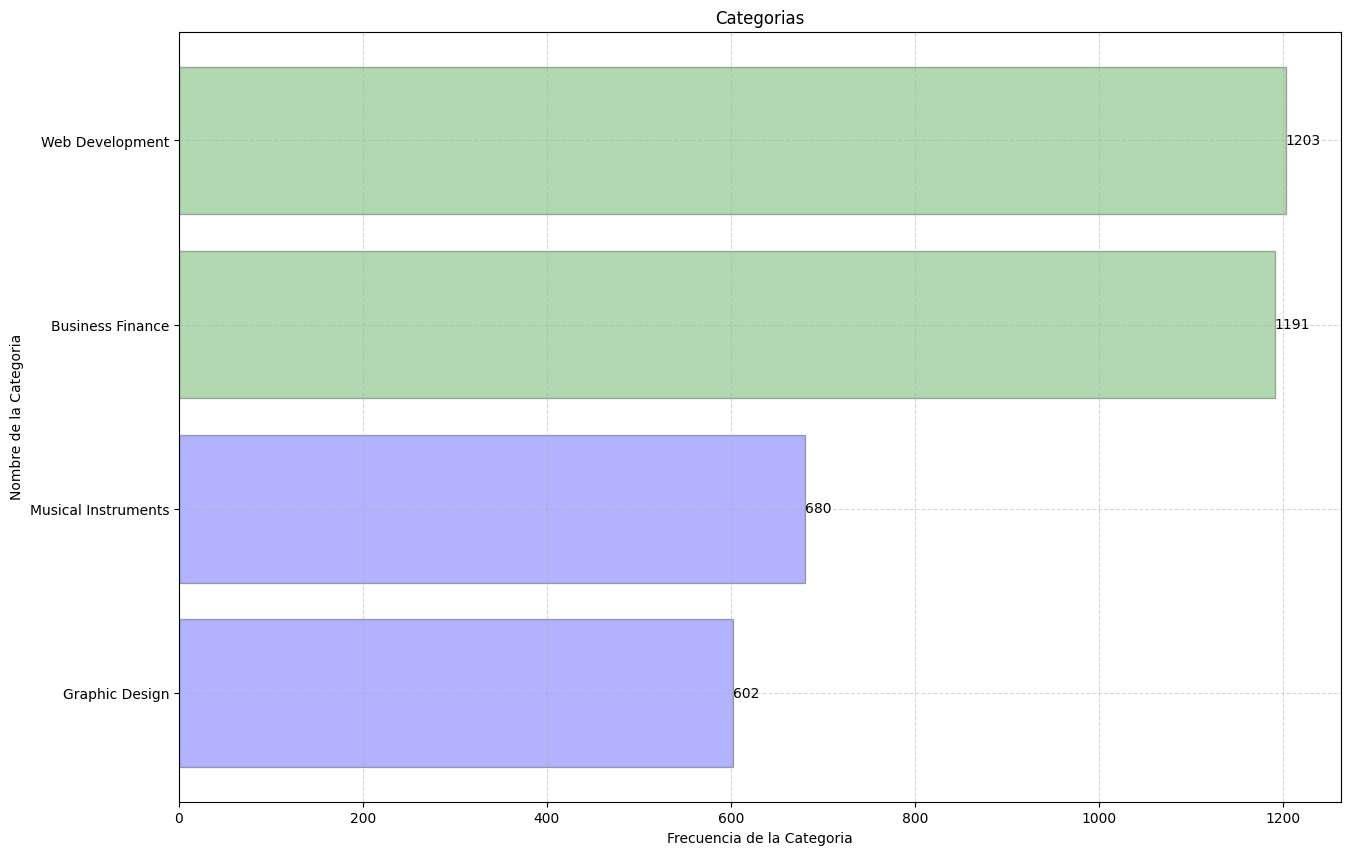

In [39]:
#Contamos:
conteo_subject = udemy_courses.subject.value_counts().sort_values()

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(15,10))
ax.barh(conteo_subject.index, conteo_subject.values, color=["blue", "blue", "green","green"],edgecolor="black", alpha=0.3)
ax.set_xlabel("Frecuencia de la Categoria")
ax.set_ylabel("Nombre de la Categoria")
ax.set_title("Categorias")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_subject.values)):
    ax.text(conteo_subject.values[i], conteo_subject.index[i], int(conteo_subject.values[i]), ha='left', va='center')
plt.show();

Insight:
* Podemos observar que Udemy solo posee 4 categorias.
* Las dos categorias mas importantes son Web Development y Business Finance.
* Tanto en Udemy como en Edx podemos observar que existe una similitud en cuanto a las categorias que imparten siendo que en Edx las categorias que tienen mas cursos son Computer Science y Business & Management.

rating

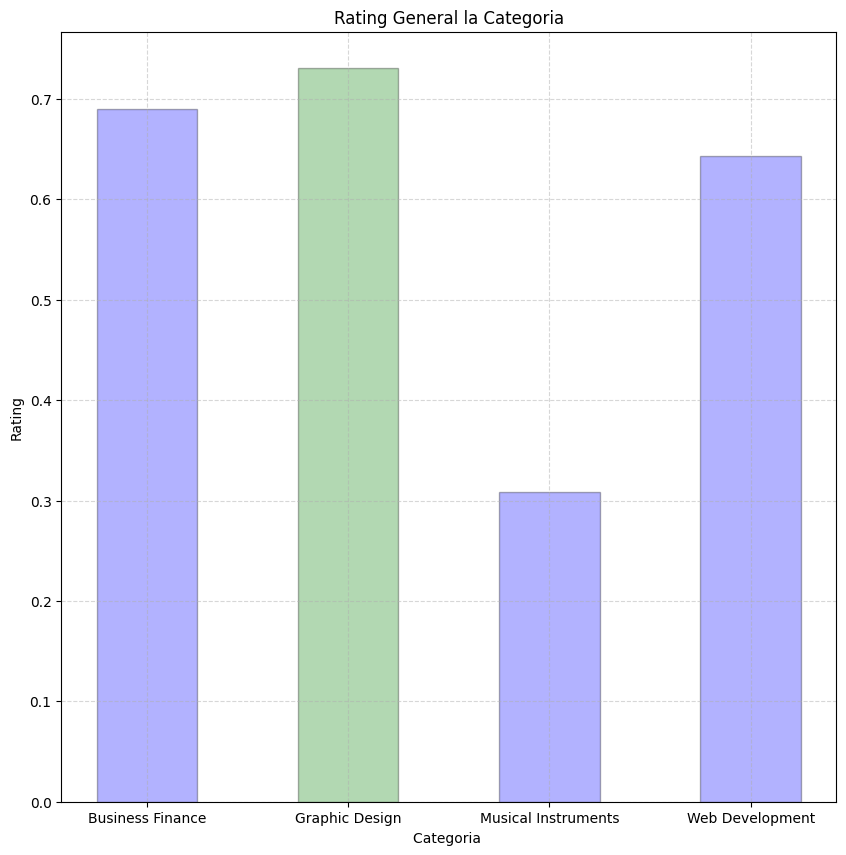

In [40]:
#Nuevas variables para los meses del año:
unicos = ['Business Finance', 'Graphic Design', 'Musical Instruments','Web Development']
business = [0]
design = [0]
instruments = [0]
web = [0]

#Creamos la iteracion para encontrar el año y la categoria
for indice, elemento in enumerate(udemy_courses.published_month_name):
    if unicos[0] in udemy_courses.subject[indice]:
        business[0]+=udemy_courses.rating[indice]
    elif unicos[1] in udemy_courses.subject[indice]:
        design[0]+=udemy_courses.rating[indice]
    elif unicos[2] in udemy_courses.subject[indice]:
        instruments[0]+=udemy_courses.rating[indice]
    elif unicos[3] in udemy_courses.subject[indice]:
        web[0]+=udemy_courses.rating[indice]
    elif unicos[0] in udemy_courses.subject[indice]:
        business[0]+=udemy_courses.rating[indice]
    elif unicos[1] in udemy_courses.subject[indice]:
        design[0]+=udemy_courses.rating[indice]
    elif unicos[2] in udemy_courses.subject[indice]:
        instruments[0]+=udemy_courses.rating[indice]
    elif unicos[3] in udemy_courses.subject[indice]:
        web[0]+=udemy_courses.rating[indice]
    elif unicos[0] in udemy_courses.subject[indice]:
        business[0]+=udemy_courses.rating[indice]
    elif unicos[1] in udemy_courses.subject[indice]:
        design[0]+=udemy_courses.rating[indice]
    elif unicos[2] in udemy_courses.subject[indice]:
        instruments[0]+=udemy_courses.rating[indice]
    elif unicos[3] in udemy_courses.subject[indice]:
        web[0]+=udemy_courses.rating[indice]
    elif unicos[0] in udemy_courses.subject[indice]:
        business[0]+=udemy_courses.rating[indice]
    elif unicos[1] in udemy_courses.subject[indice]:
        design[0]+=udemy_courses.rating[indice]
    elif unicos[2] in udemy_courses.subject[indice]:
        instruments[0]+=udemy_courses.rating[indice]
    elif unicos[3] in udemy_courses.subject[indice]:
        web[0]+=udemy_courses.rating[indice]

  
#Obtenemos el rating total de cada categoria
b= business[0] / len(udemy_courses[udemy_courses["subject"]=="Business Finance"])
d = design[0]/ len(udemy_courses[udemy_courses["subject"]=='Graphic Design'])
i = instruments[0]/ len(udemy_courses[udemy_courses["subject"]=='Musical Instruments'])
w = web[0]/ len(udemy_courses[udemy_courses["subject"]=='Web Development'])
rating = [b,d,i,w]



#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.bar(unicos, rating, width=0.5, edgecolor="black",color=["blue", "green","blue","blue"], alpha=0.3)
ax.set_ylabel("Rating")
ax.set_xlabel("Categoria ")
ax.set_title("Rating General la Categoria")
ax.grid(visible=True, ls="--", alpha=0.5)
plt.show();

# Analisis Multivariables

published_year vs num_subscribers

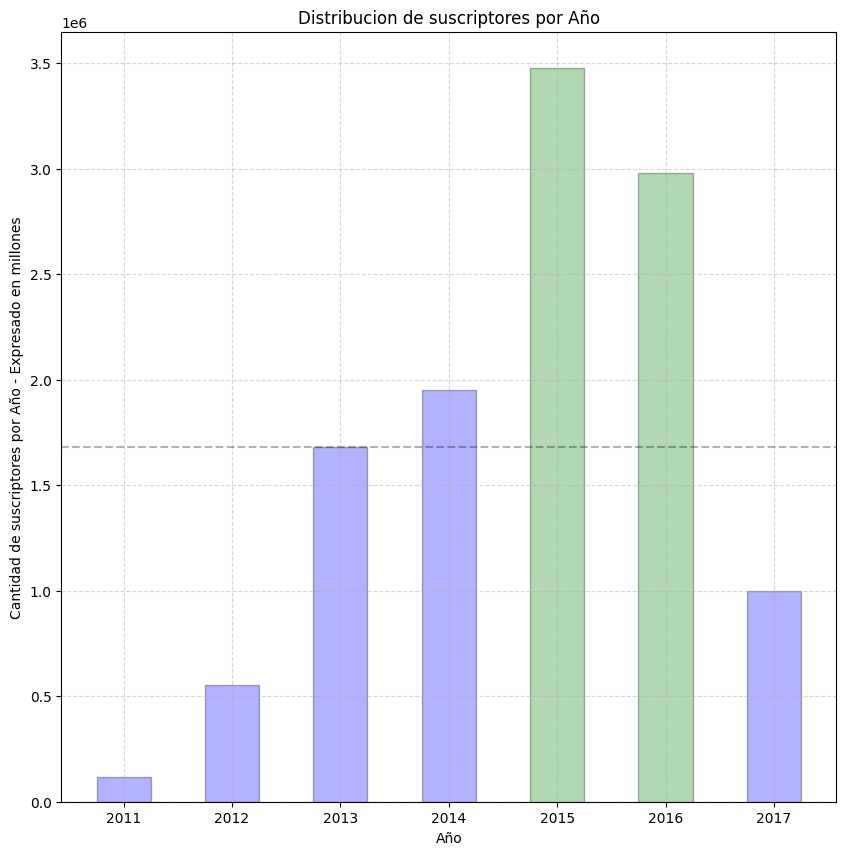

In [41]:
#Contamos:
conteo_year_subs = udemy_courses.groupby("published_year")["num_subscribers"].sum()


#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.bar(conteo_year_subs.index, conteo_year_subs.values, width=0.5, edgecolor="black",color=["blue","blue","blue","blue","green", "green", "blue"], alpha=0.3)
ax.set_ylabel("Cantidad de suscriptores por Año - Expresado en millones")
ax.set_xlabel("Año")
ax.set_title("Distribucion de suscriptores por Año")
ax.grid(visible=True, ls="--", alpha=0.5)
ax.axhline(conteo_year_subs.mean(), ls="--", color="black", alpha=0.3) #Media del total de Años.
plt.show();

Insight:
* A traves de los años la cantidad de alumnos va en aumento, y asi ocurrio desde el 2011 al 2015.
* Del año 2016 al 2017 se observa que existe un declive de suscriptores.
* Solamente los años 2014, 2015 y 2016 se encuentran por encima del promedio de los suscriptores totales.
* Asi como analizamos los años y los cursos que se estrenaron por cada uno de ellos, podemos extraer 2 conclusiones importantes: 
    * El mejor año de estrenos y suscriptores fue el 2015 
    * Aunque el año con mayor cantidad de cursos estrenados fue el 2016 existio un decremento de suscriptores en comparacion con el 2015

published year vs subject

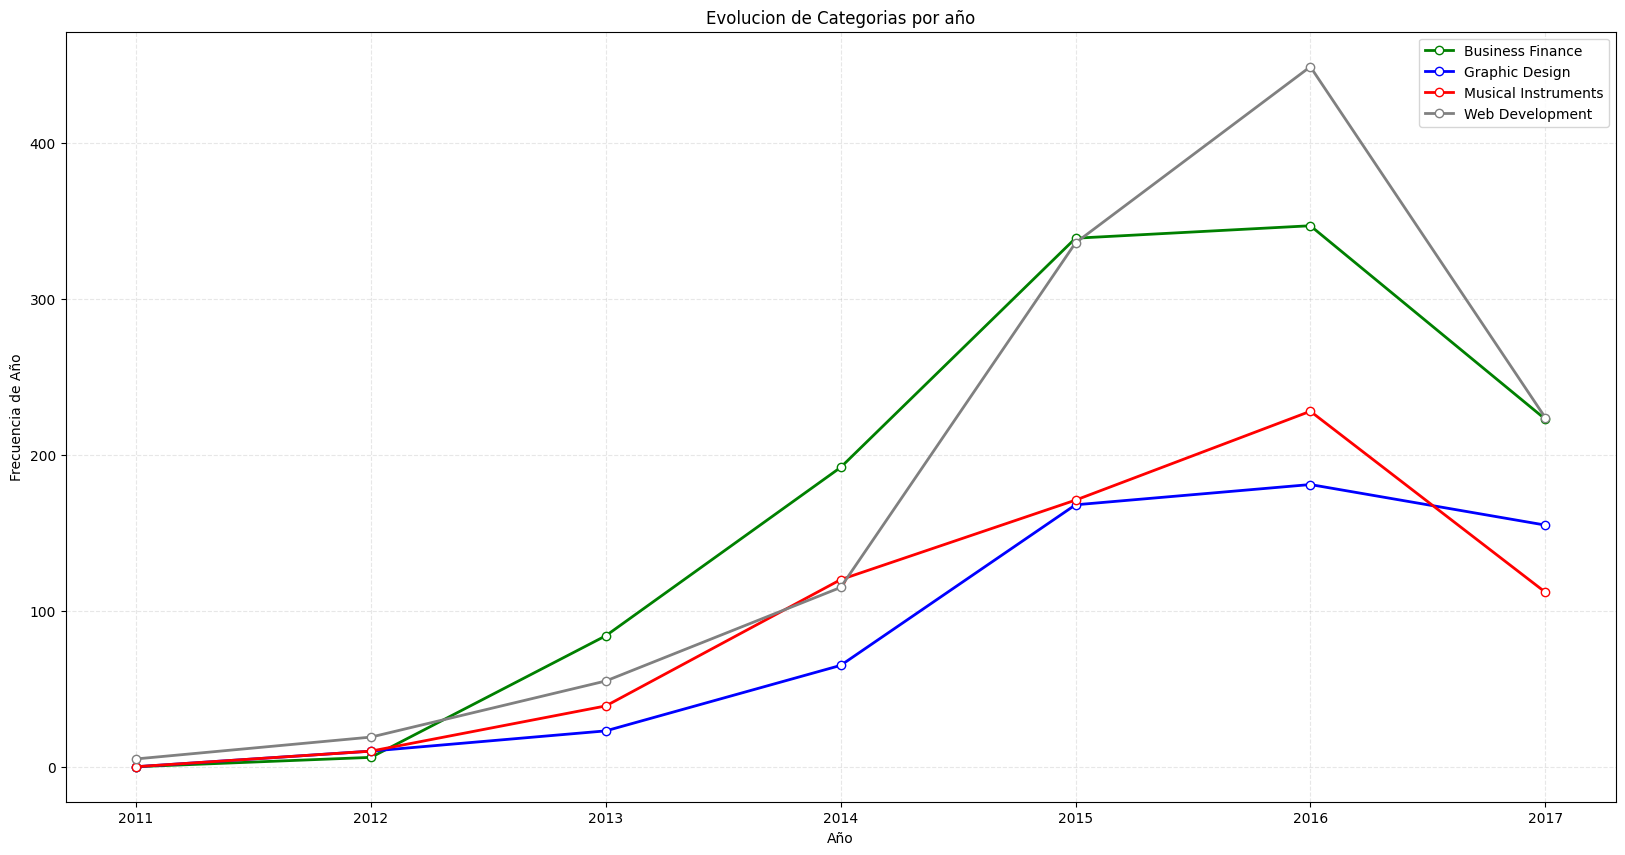

In [42]:
#Creamos una iteracion para recorrer todos los años y categorias y obtener datos por si solos, para armar una nueva grafica.

unicos = ['Business Finance', 'Graphic Design', 'Musical Instruments','Web Development']

business = [0,0,0,0,0,0,0]
design = [0,0,0,0,0,0,0]
instruments = [0,0,0,0,0,0,0]
web = [0,0,0,0,0,0,0]

conteo = 0

for indice, elemento in enumerate(udemy_courses.published_year):
    if udemy_courses.published_year[indice]==2011 and unicos[0] in udemy_courses.subject[indice]:
        business[0]+=1
    elif udemy_courses.published_year[indice]==2012 and unicos[0] in udemy_courses.subject[indice]:
        business[1]+=1
    elif udemy_courses.published_year[indice]==2013 and unicos[0] in udemy_courses.subject[indice]:
        business[2]+=1
    elif udemy_courses.published_year[indice]==2014 and unicos[0] in udemy_courses.subject[indice]:
        business[3]+=1        
    elif udemy_courses.published_year[indice]==2015 and unicos[0] in udemy_courses.subject[indice]:
        business[4]+=1
    elif udemy_courses.published_year[indice]==2016 and unicos[0]in udemy_courses.subject[indice]:
        business[5]+=1
    elif udemy_courses.published_year[indice]==2017 and unicos[0] in udemy_courses.subject[indice]:
        business[6]+=1
    elif udemy_courses.published_year[indice]==2011 and unicos[1] in udemy_courses.subject[indice]:
        design[0]+=1
    elif udemy_courses.published_year[indice]==2012 and unicos[1] in udemy_courses.subject[indice]:
        design[1]+=1
    elif udemy_courses.published_year[indice]==2013 and unicos[1] in udemy_courses.subject[indice]:
        design[2]+=1
    elif udemy_courses.published_year[indice]==2014 and unicos[1] in udemy_courses.subject[indice]:
        design[3]+=1        
    elif udemy_courses.published_year[indice]==2015 and unicos[1] in udemy_courses.subject[indice]:
        design[4]+=1
    elif udemy_courses.published_year[indice]==2016 and unicos[1]in udemy_courses.subject[indice]:
        design[5]+=1
    elif udemy_courses.published_year[indice]==2017 and unicos[1] in udemy_courses.subject[indice]:
        design[6]+=1
    elif udemy_courses.published_year[indice]==2011 and unicos[2] in udemy_courses.subject[indice]:
        instruments[0]+=1
    elif udemy_courses.published_year[indice]==2012 and unicos[2] in udemy_courses.subject[indice]:
        instruments[1]+=1
    elif udemy_courses.published_year[indice]==2013 and unicos[2] in udemy_courses.subject[indice]:
        instruments[2]+=1
    elif udemy_courses.published_year[indice]==2014 and unicos[2] in udemy_courses.subject[indice]:
        instruments[3]+=1        
    elif udemy_courses.published_year[indice]==2015 and unicos[2] in udemy_courses.subject[indice]:
        instruments[4]+=1
    elif udemy_courses.published_year[indice]==2016 and unicos[2]in udemy_courses.subject[indice]:
        instruments[5]+=1
    elif udemy_courses.published_year[indice]==2017 and unicos[2] in udemy_courses.subject[indice]:
        instruments[6]+=1
    elif udemy_courses.published_year[indice]==2011 and unicos[3] in udemy_courses.subject[indice]:
        web[0]+=1
    elif udemy_courses.published_year[indice]==2012 and unicos[3] in udemy_courses.subject[indice]:
        web[1]+=1
    elif udemy_courses.published_year[indice]==2013 and unicos[3] in udemy_courses.subject[indice]:
        web[2]+=1
    elif udemy_courses.published_year[indice]==2014 and unicos[3] in udemy_courses.subject[indice]:
        web[3]+=1        
    elif udemy_courses.published_year[indice]==2015 and unicos[3] in udemy_courses.subject[indice]:
        web[4]+=1
    elif udemy_courses.published_year[indice]==2016 and unicos[3]in udemy_courses.subject[indice]:
        web[5]+=1
    elif udemy_courses.published_year[indice]==2017 and unicos[3] in udemy_courses.subject[indice]:
        web[6]+=1



#Definimos la variable x:
conteo_year = [2011,2012,2013,2014,2015,2016,2017]

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))
ax.plot(conteo_year, business, color= "green",lw=2 ,marker="o", markerfacecolor="white", label="Business Finance")
ax.plot(conteo_year, design, color= "blue",lw=2 ,marker="o", markerfacecolor="white", label="Graphic Design")
ax.plot(conteo_year, instruments, color= "red",lw=2 ,marker="o", markerfacecolor="white", label="Musical Instruments")
ax.plot(conteo_year, web, color= "gray",lw=2 ,marker="o", markerfacecolor="white", label="Web Development")
ax.grid(True, ls="--", alpha=0.3)
ax.set_ylabel("Frecuencia de Año")
ax.set_xlabel("Año")
ax.set_title("Evolucion de Categorias por año")
ax.legend()


plt.show();

Insight:
* Se realiza una separacion por categoria para ver la evolucion de las mismas a traves de los años y como se comportan.
* Para el año 2011 podemos ver que la creacion de cursos en cada materia fue muy baja casi tendiendo a 0.
* Para todas las categorias el año con mayor cantidad de cursos estrenados fue en el año 2016.
* Podemos observar que las categorias que tuvieron mas creacion de cursos fueron "Business Finance" y "Web Development"
* Desde el 2013 al 2015 la categoria con mayor cursos estrenados fue "Business Finance" sin embargo ocurre algo interesante donde los cursos catalogados como "Web Development" superan con casi 30% mas sobre el que venia siendo por definicion una categoria con muca importancia como lo era "Business Finance".


published_month vs subject

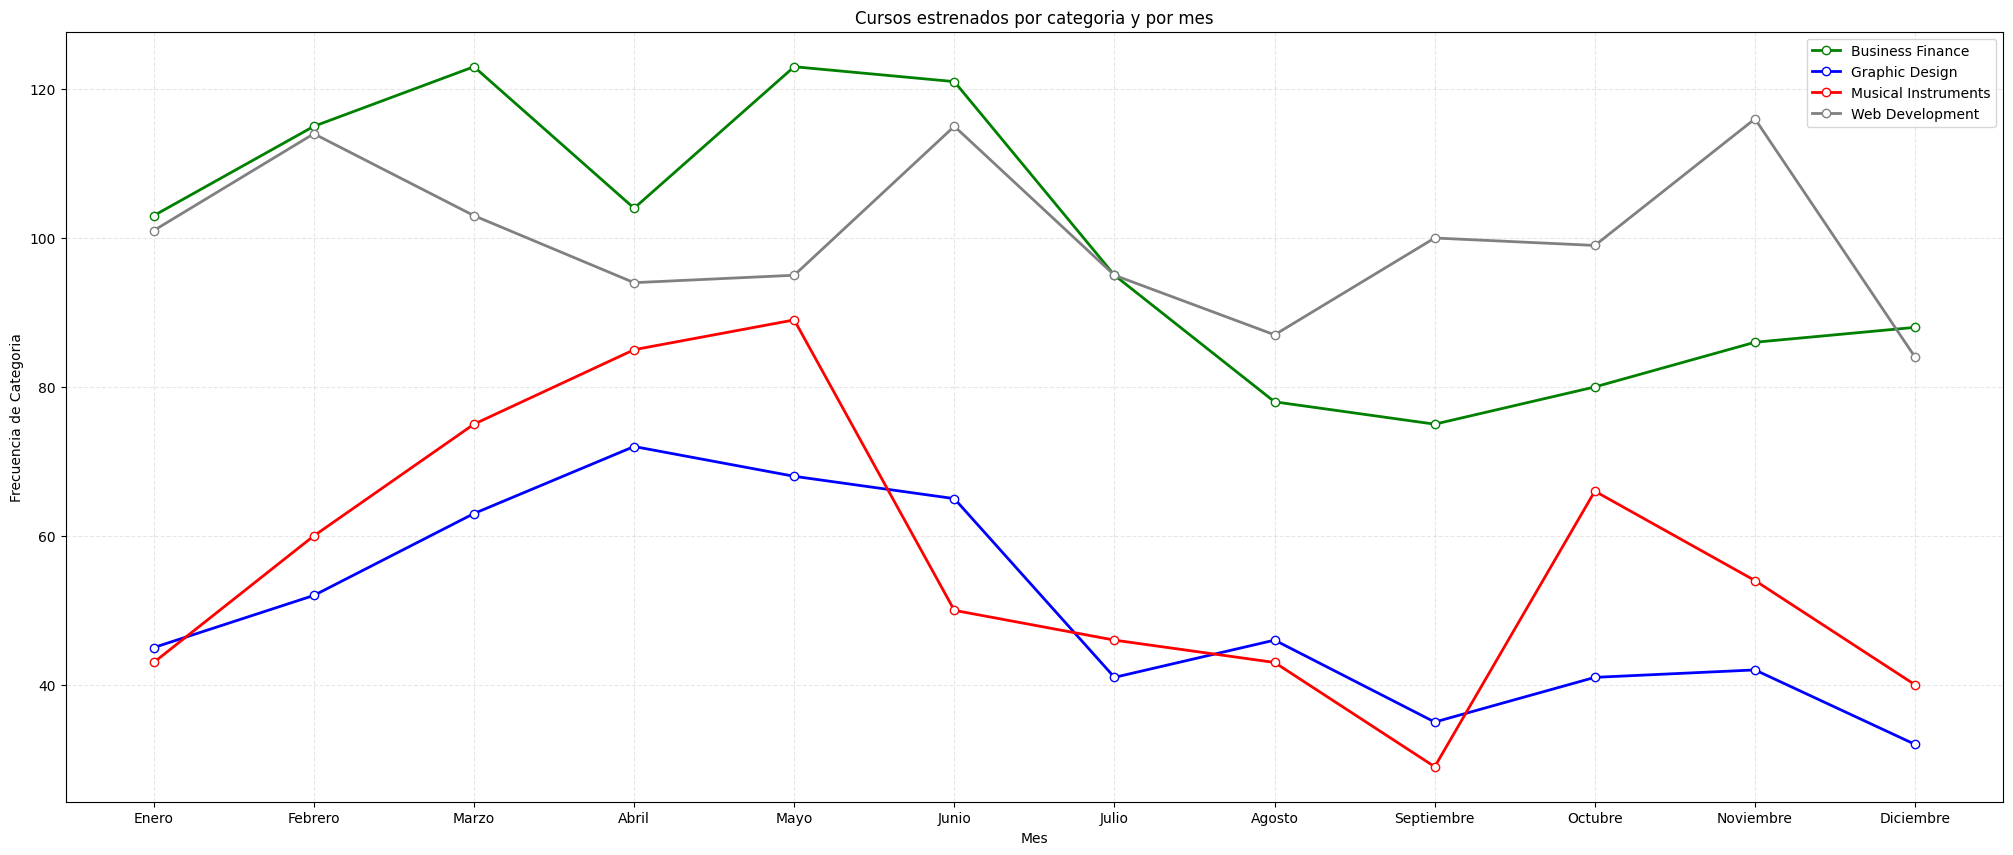

In [43]:
#Nuevas variables para los meses del año:
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
unicos = ['Business Finance', 'Graphic Design', 'Musical Instruments','Web Development']
business = [0,0,0,0,0,0,0,0,0,0,0,0]
design = [0,0,0,0,0,0,0,0,0,0,0,0]
instruments = [0,0,0,0,0,0,0,0,0,0,0,0]
web = [0,0,0,0,0,0,0,0,0,0,0,0]

#Creamos la iteracion para encontrar el año y la categoria
for indice, elemento in enumerate(udemy_courses.published_month_name):
    if udemy_courses.published_month_name[indice]==meses[0] and unicos[0] in udemy_courses.subject[indice]:
        business[0]+=1
    elif udemy_courses.published_month_name[indice]==meses[0] and unicos[1] in udemy_courses.subject[indice]:
        design[0]+=1
    elif udemy_courses.published_month_name[indice]==meses[0] and unicos[2] in udemy_courses.subject[indice]:
        instruments[0]+=1
    elif udemy_courses.published_month_name[indice]==meses[0] and unicos[3] in udemy_courses.subject[indice]:
        web[0]+=1
    if udemy_courses.published_month_name[indice]==meses[1] and unicos[0] in udemy_courses.subject[indice]:
        business[1]+=1
    elif udemy_courses.published_month_name[indice]==meses[1] and unicos[1] in udemy_courses.subject[indice]:
        design[1]+=1
    elif udemy_courses.published_month_name[indice]==meses[1] and unicos[2] in udemy_courses.subject[indice]:
        instruments[1]+=1
    elif udemy_courses.published_month_name[indice]==meses[1] and unicos[3] in udemy_courses.subject[indice]:
        web[1]+=1
    if udemy_courses.published_month_name[indice]==meses[2] and unicos[0] in udemy_courses.subject[indice]:
        business[2]+=1
    elif udemy_courses.published_month_name[indice]==meses[2] and unicos[1] in udemy_courses.subject[indice]:
        design[2]+=1
    elif udemy_courses.published_month_name[indice]==meses[2] and unicos[2] in udemy_courses.subject[indice]:
        instruments[2]+=1
    elif udemy_courses.published_month_name[indice]==meses[2] and unicos[3] in udemy_courses.subject[indice]:
        web[2]+=1
    elif udemy_courses.published_month_name[indice]==meses[3] and unicos[0] in udemy_courses.subject[indice]:
        business[3]+=1
    elif udemy_courses.published_month_name[indice]==meses[3] and unicos[1] in udemy_courses.subject[indice]:
        design[3]+=1
    elif udemy_courses.published_month_name[indice]==meses[3] and unicos[2] in udemy_courses.subject[indice]:
        instruments[3]+=1
    elif udemy_courses.published_month_name[indice]==meses[3] and unicos[3] in udemy_courses.subject[indice]:
        web[3]+=1
    elif udemy_courses.published_month_name[indice]==meses[4] and unicos[0] in udemy_courses.subject[indice]:
        business[4]+=1
    elif udemy_courses.published_month_name[indice]==meses[4] and unicos[1] in udemy_courses.subject[indice]:
        design[4]+=1
    elif udemy_courses.published_month_name[indice]==meses[4] and unicos[2] in udemy_courses.subject[indice]:
        instruments[4]+=1
    elif udemy_courses.published_month_name[indice]==meses[4] and unicos[3] in udemy_courses.subject[indice]:
        web[4]+=1
    elif udemy_courses.published_month_name[indice]==meses[5] and unicos[0] in udemy_courses.subject[indice]:
        business[5]+=1
    elif udemy_courses.published_month_name[indice]==meses[5] and unicos[1] in udemy_courses.subject[indice]:
        design[5]+=1
    elif udemy_courses.published_month_name[indice]==meses[5] and unicos[2] in udemy_courses.subject[indice]:
        instruments[5]+=1
    elif udemy_courses.published_month_name[indice]==meses[5] and unicos[3] in udemy_courses.subject[indice]:
        web[5]+=1
    elif udemy_courses.published_month_name[indice]==meses[6] and unicos[0] in udemy_courses.subject[indice]:
        business[6]+=1
    elif udemy_courses.published_month_name[indice]==meses[6] and unicos[1] in udemy_courses.subject[indice]:
        design[6]+=1
    elif udemy_courses.published_month_name[indice]==meses[6] and unicos[2] in udemy_courses.subject[indice]:
        instruments[6]+=1
    elif udemy_courses.published_month_name[indice]==meses[6] and unicos[3] in udemy_courses.subject[indice]:
        web[6]+=1
    elif udemy_courses.published_month_name[indice]==meses[7] and unicos[0] in udemy_courses.subject[indice]:
        business[7]+=1
    elif udemy_courses.published_month_name[indice]==meses[7] and unicos[1] in udemy_courses.subject[indice]:
        design[7]+=1
    elif udemy_courses.published_month_name[indice]==meses[7] and unicos[2] in udemy_courses.subject[indice]:
        instruments[7]+=1
    elif udemy_courses.published_month_name[indice]==meses[7] and unicos[3] in udemy_courses.subject[indice]:
        web[7]+=1
    elif udemy_courses.published_month_name[indice]==meses[8] and unicos[0] in udemy_courses.subject[indice]:
        business[8]+=1
    elif udemy_courses.published_month_name[indice]==meses[8] and unicos[1] in udemy_courses.subject[indice]:
        design[8]+=1
    elif udemy_courses.published_month_name[indice]==meses[8] and unicos[2] in udemy_courses.subject[indice]:
        instruments[8]+=1
    elif udemy_courses.published_month_name[indice]==meses[8] and unicos[3] in udemy_courses.subject[indice]:
        web[8]+=1
    elif udemy_courses.published_month_name[indice]==meses[9] and unicos[0] in udemy_courses.subject[indice]:
        business[9]+=1
    elif udemy_courses.published_month_name[indice]==meses[9] and unicos[1] in udemy_courses.subject[indice]:
        design[9]+=1
    elif udemy_courses.published_month_name[indice]==meses[9] and unicos[2] in udemy_courses.subject[indice]:
        instruments[9]+=1
    elif udemy_courses.published_month_name[indice]==meses[9] and unicos[3] in udemy_courses.subject[indice]:
        web[9]+=1
    elif udemy_courses.published_month_name[indice]==meses[10] and unicos[0] in udemy_courses.subject[indice]:
        business[10]+=1
    elif udemy_courses.published_month_name[indice]==meses[10] and unicos[1] in udemy_courses.subject[indice]:
        design[10]+=1
    elif udemy_courses.published_month_name[indice]==meses[10] and unicos[2] in udemy_courses.subject[indice]:
        instruments[10]+=1
    elif udemy_courses.published_month_name[indice]==meses[10] and unicos[3] in udemy_courses.subject[indice]:
        web[10]+=1
    elif udemy_courses.published_month_name[indice]==meses[11] and unicos[0] in udemy_courses.subject[indice]:
        business[11]+=1
    elif udemy_courses.published_month_name[indice]==meses[11] and unicos[1] in udemy_courses.subject[indice]:
        design[11]+=1
    elif udemy_courses.published_month_name[indice]==meses[11] and unicos[2] in udemy_courses.subject[indice]:
        instruments[11]+=1
    elif udemy_courses.published_month_name[indice]==meses[11] and unicos[3] in udemy_courses.subject[indice]:
        web[11]+=1



#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(25,10))
ax.plot(meses, business, color= "green",lw=2 ,marker="o", markerfacecolor="white", label="Business Finance")
ax.plot(meses, design, color= "blue",lw=2 ,marker="o", markerfacecolor="white", label="Graphic Design")
ax.plot(meses, instruments, color= "red",lw=2 ,marker="o", markerfacecolor="white", label="Musical Instruments")
ax.plot(meses, web, color= "gray",lw=2 ,marker="o", markerfacecolor="white", label="Web Development")
ax.grid(True, ls="--", alpha=0.3)
ax.set_ylabel("Frecuencia de Categoria")
ax.set_xlabel("Mes")
ax.set_title("Cursos estrenados por categoria y por mes")
ax.legend()


plt.show();

Insight:
* Tal como pudimos ver en los años las categorias "top" por excelencia en cuanto a cursos estrenados es "Business Finance" y "Web Development"
* El unico mes donde se estrenaron la misma cantidad de cursos catalogados en "Business Finance" y "Web Development" fue en Julio.
* Desde el mes de agosto a noviembre ambas categorias "top" tuvieron un ascenso considerable entre el 10 al 20% con respecto al mes anterior
* Las otras 2 categorias restante "Graphic Design" y "Musical Instruments" se mantienen por debajo de las categorias "top" por lo general durante todos los meses de todos los años.

published_year vs subscribers

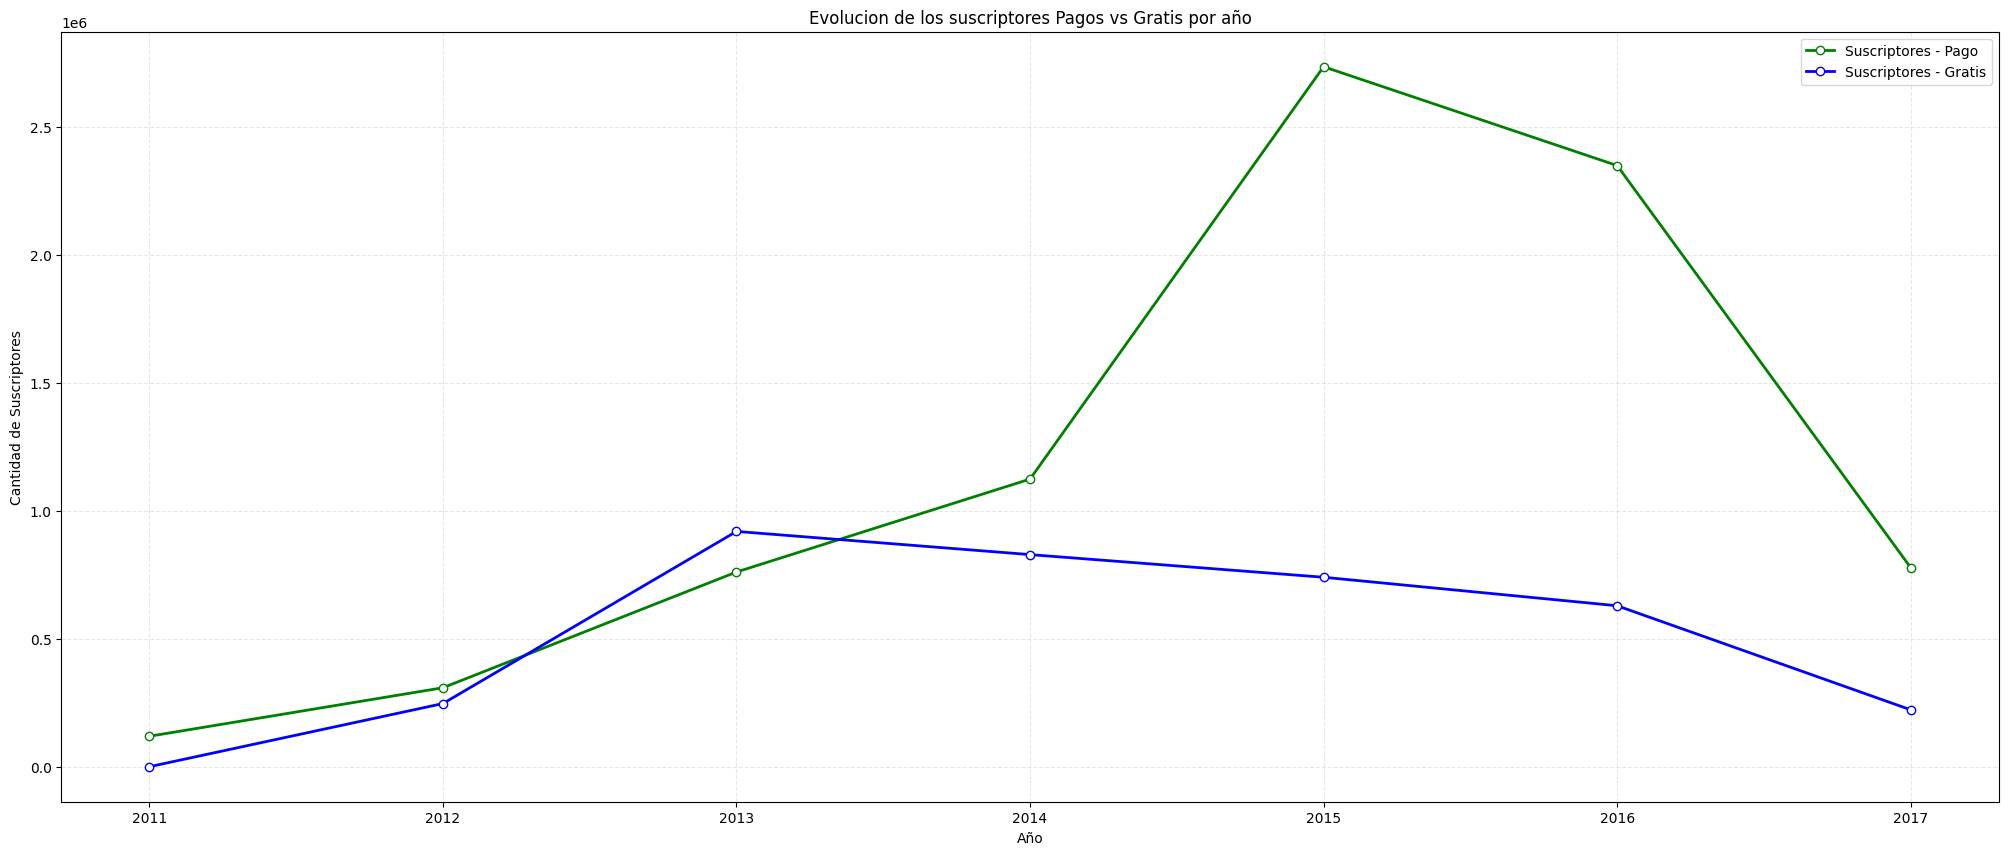

In [44]:
#Nueva variable para los año:
conteo_year = [2011,2012,2013,2014,2015,2016,2017]
unicos = [True, False]

pago = [0,0,0,0,0,0,0]
no_pago = [0,0,0,0,0,0,0]
#Creamos una iteracion para obtener la cantidad de suscriptores pagos y gratis por año.
for indice, elemento in enumerate(udemy_courses.is_paid):
    if udemy_courses.published_year[indice]==2011 and unicos[0] == udemy_courses.is_paid[indice]:
        pago[0]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2012 and unicos[0] == udemy_courses.is_paid[indice]:
        pago[1]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2013 and unicos[0] == udemy_courses.is_paid[indice]:
        pago[2]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2014 and unicos[0] == udemy_courses.is_paid[indice]:
        pago[3]+=udemy_courses["num_subscribers"][indice]     
    elif udemy_courses.published_year[indice]==2015 and unicos[0] == udemy_courses.is_paid[indice]:
        pago[4]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2016 and unicos[0] == udemy_courses.is_paid[indice]:
        pago[5]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2017 and unicos[0] == udemy_courses.is_paid[indice]:
        pago[6]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2011 and unicos[1] == udemy_courses.is_paid[indice]:
        no_pago[0]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2012 and unicos[1] == udemy_courses.is_paid[indice]:
        no_pago[1]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2013 and unicos[1] == udemy_courses.is_paid[indice]:
        no_pago[2]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2014 and unicos[1] == udemy_courses.is_paid[indice]:
        no_pago[3]+=udemy_courses["num_subscribers"][indice]    
    elif udemy_courses.published_year[indice]==2015 and unicos[1] == udemy_courses.is_paid[indice]:
        no_pago[4]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2016 and unicos[1] == udemy_courses.is_paid[indice]:
        no_pago[5]+=udemy_courses["num_subscribers"][indice]
    elif udemy_courses.published_year[indice]==2017 and unicos[1] == udemy_courses.is_paid[indice]:
        no_pago[6]+=udemy_courses["num_subscribers"][indice]


#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(25,10))
ax.plot(conteo_year, pago, color= "green",lw=2 ,marker="o", markerfacecolor="white", label="Suscriptores - Pago")
ax.plot(conteo_year, no_pago, color= "blue",lw=2 ,marker="o", markerfacecolor="white", label="Suscriptores - Gratis")
ax.set_ylabel("Cantidad de Suscriptores")
ax.set_xlabel("Año")
ax.set_title("Evolucion de los suscriptores Pagos vs Gratis por año")
ax.grid(True, ls="--", alpha=0.3)
ax.legend()
plt.show();

Insight:
* Podemos observar que los suscriptores que pagan por su curso van en constante aumento del año 2011 al 2015, siendo el 2015 el año con mayor cantidad de suscriptores pago.
* Desde el año 2015 al 2017 existe un declive de los usurios que pagan por su curso habiendo una perdida de casi 1.5millones de usuarios.
* Se observa que pese a la cantidad de cursos gratuitos existe una gran brecha de suscriptores.
* Los cursos gratuites solamente alcanzaron un pick de 1millon de suscriptores para el año 2013 de alli fue en declive de un 10 a 15% anual de perdida en cuanto a nuevos suscriptores.


num_lectures vs num_subscribers vs is_paid

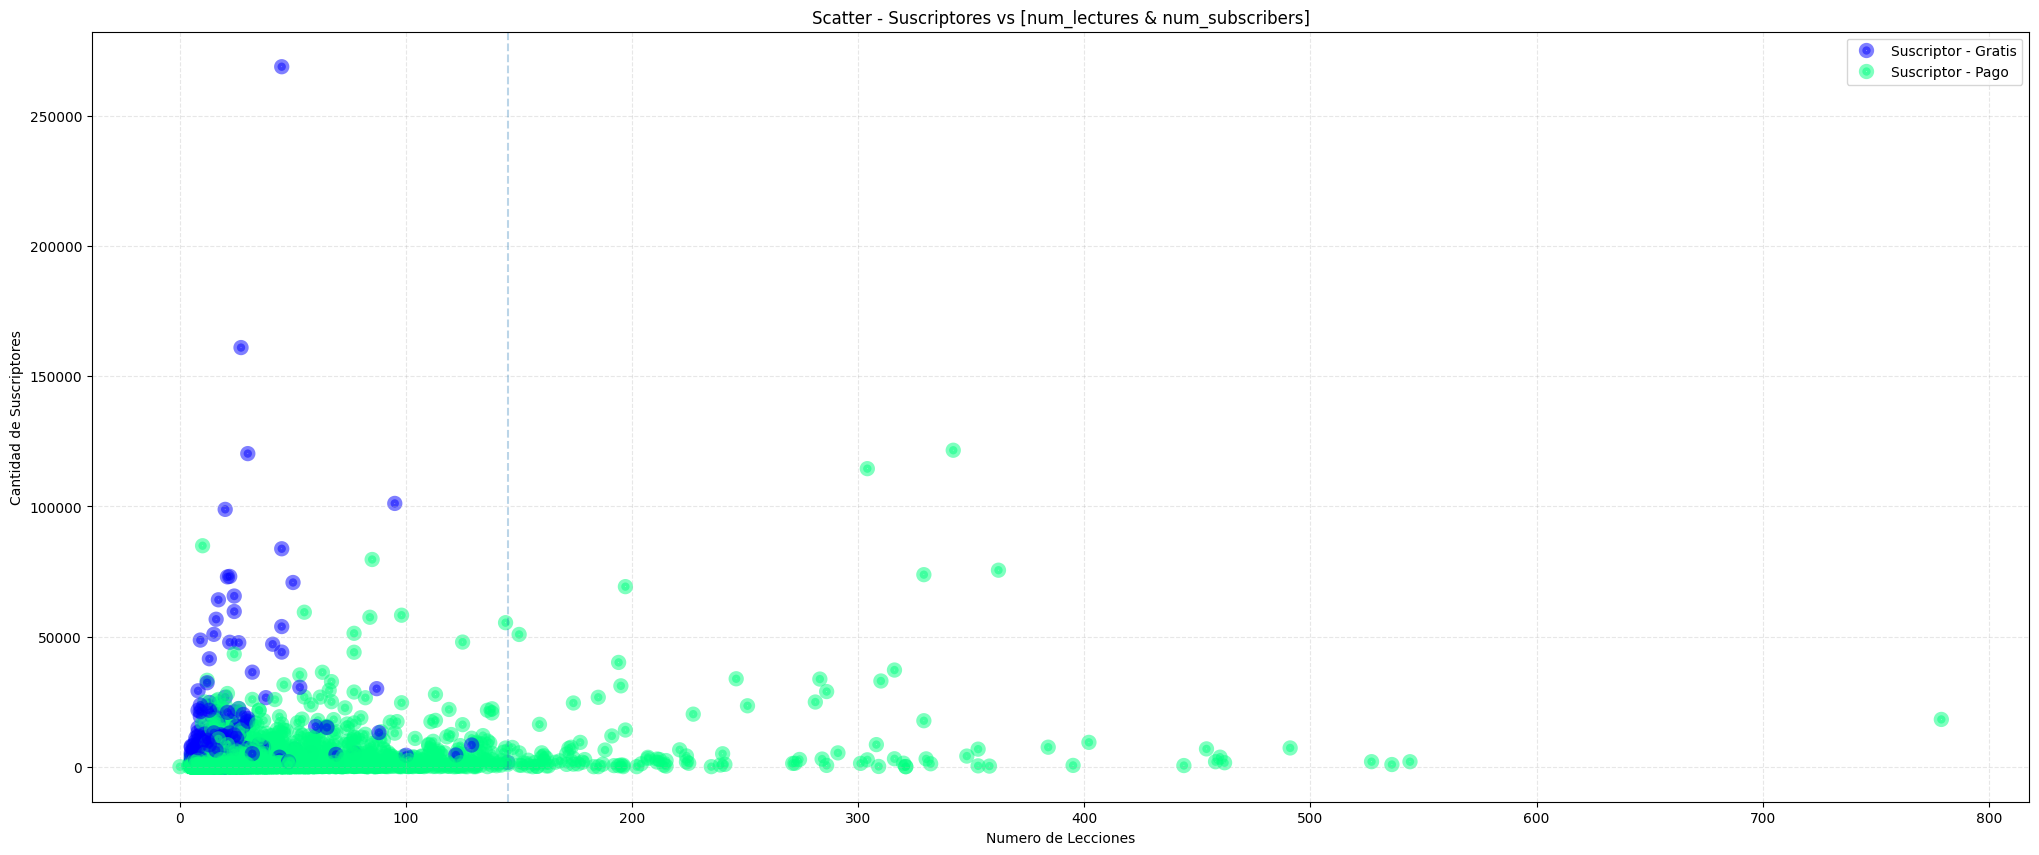

In [45]:
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(25,10))


#Tenemos que crear las etiquetas, para ello usamos cat.categories y lo pasamos a una lista
etiquetas = udemy_courses.is_paid.cat.categories.to_list()

#Creamos el gráfico igual que antes pero no lo mostramos, lo guardamos en una variable
grafico = ax.scatter("num_lectures", "num_subscribers", c=udemy_courses.is_paid.cat.codes, cmap="winter", data= udemy_courses, alpha=0.5, lw=5)
ax.set_ylabel("Cantidad de Suscriptores")
ax.set_xlabel("Numero de Lecciones")
ax.axvline(udemy_courses[udemy_courses["is_paid"]==False]["num_lectures"].max(),ls="--", alpha=0.3, label="Mediana")
ax.set_title("Scatter - Suscriptores vs [num_lectures & num_subscribers]")
ax.grid(True, ls="--", alpha=0.3)

#Con el método legend_elements() guardamos el valor de los puntos (el código realmente no lo queremos)
valor, codigo = grafico.legend_elements()

#Añadimos la leyenda y mostramos el gráfico
ax.legend(handles=valor, labels=["Suscriptor - Gratis", "Suscriptor - Pago"])
plt.show();

Insight:
* En este grafico podemos observar que los suscriptores que no pagan prefieren cursos con menor cantidad de clases.
* Sin embargo para los que pagan el existe una gran cantidad de punto a los largo del grafico, pudiendo intuir que si pagan es en base a la cantidad de lecciones o clases que posea dicho curso.
* El numero maximo de lecciones para los que no pagaron por su curso es de 149 sin embargo este limite tambien evidencia que existe una gran concentracion de usuarios pagos dentro del rango de 0 a 149 lecciones.

num_lectures vs content_duration vs subject

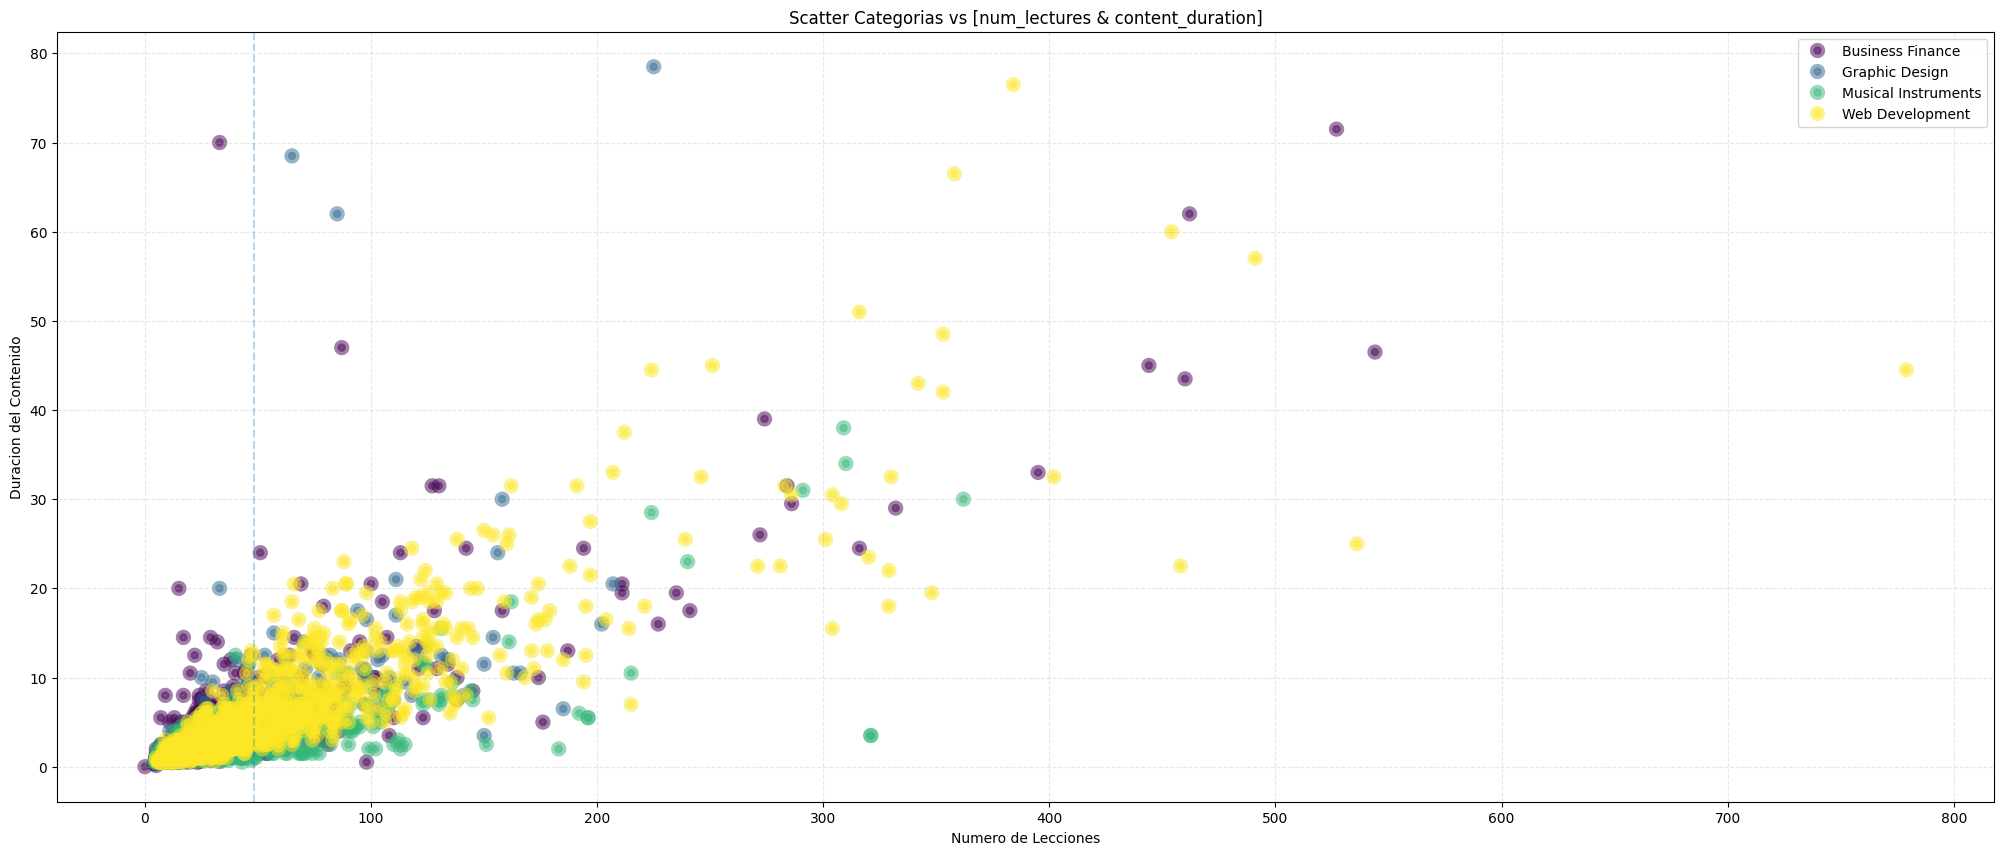

In [46]:
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(25,10))


#Tenemos que crear las etiquetas, para ello usamos cat.categories y lo pasamos a una lista
etiquetas = udemy_courses.subject.cat.categories.to_list()

#Creamos el gráfico igual que antes pero no lo mostramos, lo guardamos en una variable
grafico = ax.scatter("num_lectures", "content_duration", c=udemy_courses.subject.cat.codes,  data= udemy_courses, alpha=0.5, lw=5)
ax.set_ylabel("Duracion del Contenido")
ax.set_xlabel("Numero de Lecciones")
ax.axvline(udemy_courses[udemy_courses["is_paid"]==True]["num_lectures"].quantile(0.75),ls="--", alpha=0.3, label="Mediana")
ax.set_title("Scatter Categorias vs [num_lectures & content_duration]")
ax.grid(True, ls="--", alpha=0.3)

#Con el método legend_elements() guardamos el valor de los puntos (el código realmente no lo queremos)
valor, codigo = grafico.legend_elements()

#Añadimos la leyenda y mostramos el gráfico
ax.legend(handles=valor, labels=etiquetas)
plt.show();

num_lectures vs content_duration vs level

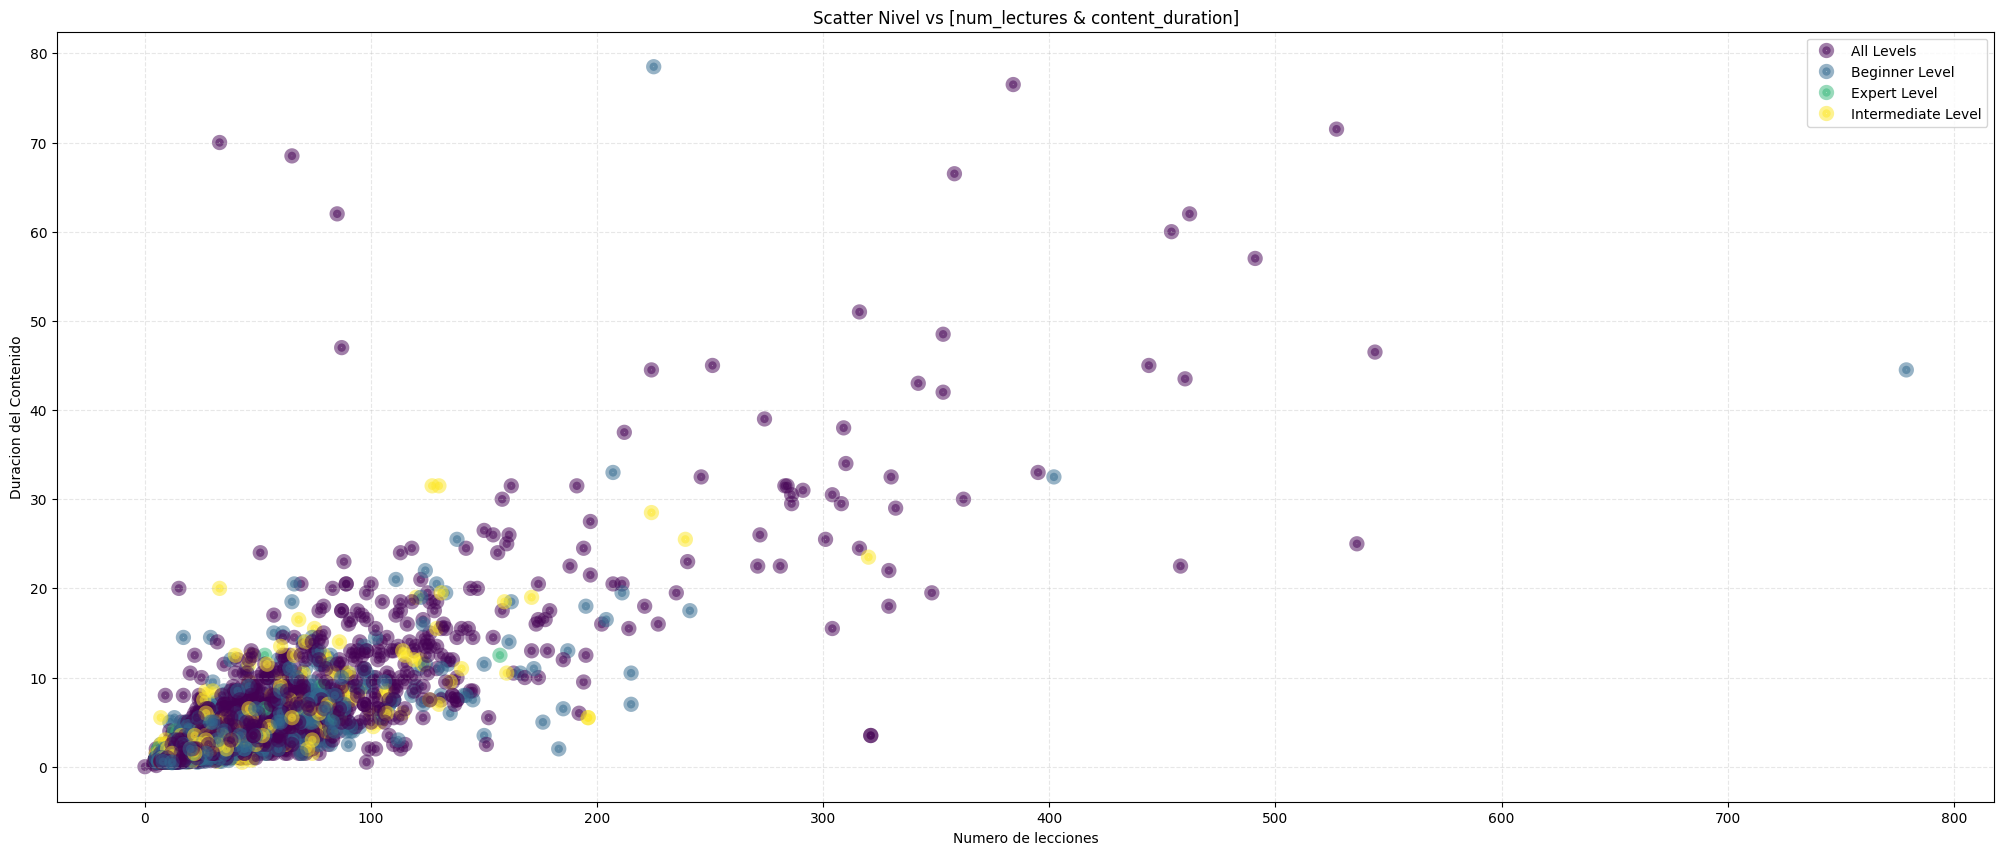

In [47]:
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(25,10))


#Tenemos que crear las etiquetas, para ello usamos cat.categories y lo pasamos a una lista
etiquetas = udemy_courses.level.cat.categories.to_list()

#Creamos el gráfico igual que antes pero no lo mostramos, lo guardamos en una variable
grafico = ax.scatter("num_lectures", "content_duration", c=udemy_courses.level.cat.codes,  data= udemy_courses, alpha=0.5, lw=5)
ax.set_ylabel("Duracion del Contenido")
ax.set_xlabel("Numero de lecciones")
ax.set_title("Scatter Nivel vs [num_lectures & content_duration]")
ax.grid(True, ls="--", alpha=0.3)

#Con el método legend_elements() guardamos el valor de los puntos (el código realmente no lo queremos)
valor, codigo = grafico.legend_elements()

#Añadimos la leyenda y mostramos el gráfico
ax.legend(handles=valor, labels=etiquetas)
plt.show();

# Conclusiones Generales:

En este analisis tomaremos para nuestro estudio a la plataforma massiva open online course (MOOC) Udemy, para poder obtener la mayor cantidad de informacion relevante, asi como patrones, insights, entre otras metricas.

Luego de haber estudiado los datos podemos extraer que en la plataforma Udemy los alumnos por lo general pagan por los cursos, ya que tienen una mayor cantidad de lecciones y tambien el contenido tiende a ser de mayor cantidad de horas.

Nuestro "top" de categorias son "Business Finance" y "Web Development", y no es algo extraño ya que poseen la mayor cantidad de alumnos en el tiempo, mayor cantidad de lecciones y adicional el tiempo del contenido tiende a ser mayor.

El precio de los cursos se concentra en el rango de $0 a $200 USD, luego de este rango los precios suben pero tienden a tener menor cantidad de estudiantes.

La categoria con mejor rating general es "Graphic Design", esto es entendible en comparacion con las "top" debido a que existe menor cantidad de cursos en dicha categoria indicando que mientras menos cursas y mayor valoracion mejor es el rating.

In [48]:
#Exportamos el CSV
udemy_courses.to_csv("udemy_EDA_v1.csv", index=False)